# Algerian Forest Fires Dataset


## Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Cleaning
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model


### 1. Problem Statement:

- **Perform Logistic Regression on Algerian forest dataset with 90% accuracy if the data is not imbalanced. And there should not be any Overfitting and Underfitting condition.**

- **If data is imbalanced:**
    - **Scenario 1:** First handle the imbalanced data and then perform Logistic Regression.
    - **Scenario 2:** First create a model, and instead of Accuracy choose either Precision, Recall or F1-Score.


**Logistic Regression :**
- In Logistic Regression the main aim is to **classify the output**.

### Feature Information about the dataset:

**Date :** (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

**Temp :** temperature noon (temperature max) in Celsius degrees: 22 to 42

**RH :** Relative Humidity in %: 21 to 90 (Relative humidity (RH) is a measure of how much moisture is in the air)

**Ws :** Wind speed in km/h: 6 to 29 (wind speed)

**Rain:** total day in mm: 0 to 16.8 (Rain in a day in mm)

**FWI(Fire Weather Index) Components :** 0 to 31.1

**Fine Fuel Moisture Code (FFMC) index from the FWI system:** 28.6 to 92.5 (numerical rating of the moisture content of litter and cured fine fuels)

**Duff Moisture Code (DMC) index from the FWI system:** 1.1 to 65.9 (The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth)

**Drought Code (DC) index from the FWI system:** 7 to 220.4 (The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers)

**Initial Spread Index (ISI) index from the FWI system:** 0 to 18.5 (Initial Spread Index is a relative measure of how quickly a fire can be expected to spread)

**Buildup Index (BUI) index from the FWI system:** 1.1 to 68 (It is a numeric rating of the total amount of fuel available for combustion)

**Fire Weather Index (FWI) Index:** 0 to 31.1 (The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.)

**Classes:** two classes, namely as fire and as not fire (Result)

**Region :** There are two regions in the dataset Bejaia Region represented by 1 and Sidi Bel-Abbes Region represented by 1

### 2. Data Collection:

#### 2.1 Import modules and data and create dataframe

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Creating a dataframe removing the 1st row

df = pd.read_csv("dataset/Algerian_forest_fires_dataset_UPDATE.csv", skiprows=1)

**Show top 5 records**

In [3]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

**Shape of the dataset**

In [4]:
df.shape

(246, 14)

**Observations:**
- There are 246 rows and 14 columns (features) in the dataset.

In [5]:
# Getting basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


**Observations:**
- Here we can see all the columns are of object type though they have numeric values.

### 3. Data Cleaning:

In [6]:
# Name of the columns:

df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

**Observations:**
- There are sapces in some column names.

In [7]:
# Trimming the spaces using list comprehension

df.columns = [column.strip() for column in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

**Finding the Unique values in the column `'Classes'`**

In [8]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [9]:
# trimming spaces of values in 'Classes' column

df['Classes'] = df['Classes'].str.strip()

In [10]:
# Let's check it again

df['Classes'].unique()

array(['not fire', 'fire', nan, 'Classes'], dtype=object)

#### Removing unnecessary rows

In [11]:
# finding index of unnecessary rows 

df[df.Classes == 'Classes']

day  month  year  Temperature   RH   Ws   Rain  FFMC  DMC  DC  ISI  BUI  \
123  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI  Classes  
123  FWI  Classes

In [12]:
df[df['Classes'].isna()]

day month  year Temperature   RH   Ws Rain  \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN  NaN   
167                             14    07  2012          37   37   18  0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes  
122   NaN   NaN     NaN   NaN   NaN      NaN     NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire        NaN

In [13]:
# Removing the rows

df.drop([167], axis=0, inplace=True)
df.drop([122, 123], axis=0, inplace=True)

In [14]:
# checking whether row is dropped
df[120:130]

day month  year Temperature  RH  Ws Rain  FFMC  DMC    DC  ISI   BUI  FWI  \
120  29    09  2012          26  80  16  1.8  47.4  2.9   7.7  0.3     3  0.1   
121  30    09  2012          25  78  14  1.4    45  1.9   7.5  0.2   2.4  0.1   
124  01    06  2012          32  71  12  0.7  57.1  2.5   8.2  0.6   2.8  0.2   
125  02    06  2012          30  73  13    4  55.7  2.7   7.8  0.6   2.9  0.2   
126  03    06  2012          29  80  14    2  48.7  2.2   7.6  0.3   2.6  0.1   
127  04    06  2012          30  64  14    0  79.4  5.2  15.4  2.2   5.6    1   
128  05    06  2012          32  60  14  0.2  77.1    6  17.6  1.8   6.5  0.9   
129  06    06  2012          35  54  11  0.1  83.7  8.4  26.3  3.1   9.3  3.1   
130  07    06  2012          35  44  17  0.2  85.6  9.9  28.9  5.4  10.7    6   
131  08    06  2012          28  51  17  1.3  71.4  7.7   7.4  1.5   7.3  0.8   

      Classes  
120  not fire  
121  not fire  
124  not fire  
125  not fire  
126  not fire  
127  not fire  
128  not fire  
129      fire  
130      fire  
131  not fire

In [15]:
df[160:170]

day month  year Temperature  RH  Ws Rain  FFMC   DMC    DC   ISI   BUI  \
162  09    07  2012          36  43  15  1.9  82.3   9.4   9.9   3.2     9   
163  10    07  2012          34  51  16  3.8  77.5     8   9.5     2   7.7   
164  11    07  2012          34  56  15  2.9  74.8   7.1   9.5   1.6   6.8   
165  12    07  2012          36  44  13    0  90.1  12.6  19.4   8.3  12.5   
166  13    07  2012          39  45  13  0.6  85.2  11.3  10.4   4.2  10.9   
168  15    07  2012          34  45  17    0  90.5    18  24.1  10.9  17.7   
169  16    07  2012          31  83  17    0  84.5  19.4  33.1   4.7  19.2   
170  17    07  2012          32  81  17    0  84.6  21.1  42.3   4.7  20.9   
171  18    07  2012          33  68  15    0  86.1  23.9  51.6   5.2  23.9   
172  19    07  2012          34  58  16    0  88.1  27.8  61.1   7.3  27.7   

      FWI   Classes  
162   3.1      fire  
163   1.3  not fire  
164   0.8  not fire  
165   9.6      fire  
166   4.7      fire  
168  14.1      fire  
169   7.3      fire  
170   7.7      fire  
171   9.1      fire  
172    13      fire

#### Adding a new column named `Region`

In [16]:
# making regions 'Bejaia' as 1 and 'Sidi-Bel Abbes' as 0

df.loc[:122, 'Region'] = 'Bejaia'
df.loc[122:, 'Region'] = 'Sidi-Bel Abbes'
df['Region'] = df['Region'].map({'Bejaia':1, 'Sidi-Bel Abbes':0})
df[120:130]

day month  year Temperature  RH  Ws Rain  FFMC  DMC    DC  ISI   BUI  FWI  \
120  29    09  2012          26  80  16  1.8  47.4  2.9   7.7  0.3     3  0.1   
121  30    09  2012          25  78  14  1.4    45  1.9   7.5  0.2   2.4  0.1   
124  01    06  2012          32  71  12  0.7  57.1  2.5   8.2  0.6   2.8  0.2   
125  02    06  2012          30  73  13    4  55.7  2.7   7.8  0.6   2.9  0.2   
126  03    06  2012          29  80  14    2  48.7  2.2   7.6  0.3   2.6  0.1   
127  04    06  2012          30  64  14    0  79.4  5.2  15.4  2.2   5.6    1   
128  05    06  2012          32  60  14  0.2  77.1    6  17.6  1.8   6.5  0.9   
129  06    06  2012          35  54  11  0.1  83.7  8.4  26.3  3.1   9.3  3.1   
130  07    06  2012          35  44  17  0.2  85.6  9.9  28.9  5.4  10.7    6   
131  08    06  2012          28  51  17  1.3  71.4  7.7   7.4  1.5   7.3  0.8   

      Classes  Region  
120  not fire       1  
121  not fire       1  
124  not fire       0  
125  not fire       0  
126  not fire       0  
127  not fire       0  
128  not fire       0  
129      fire       0  
130      fire       0  
131  not fire       0

#### Replacing the `'Classes'` column categorical values with numerical values

In [17]:
df['Classes'] = df['Classes'].map({'not fire':0, 'fire':1})
df['Classes'] = df['Classes'].astype(int)
df.sample(10)

day month  year Temperature  RH  Ws Rain  FFMC   DMC     DC  ISI   BUI  \
10   11    06  2012          31  65  14    0  84.5  12.5   54.3    4  15.8   
224  09    09  2012          30  80  15    0  83.1   7.9   34.5  3.5    10   
79   19    08  2012          35  62  19    0  89.4  23.2  120.9  9.7  31.3   
4    05    06  2012          27  77  16    0  64.8     3   14.2  1.2   3.9   
237  22    09  2012          33  64  13    0  88.9  26.1  106.3  7.1  32.4   
13   14    06  2012          30  78  20  0.5    59   4.6    7.8    1   4.4   
221  06    09  2012          34  71  14  6.5  64.5   3.3    9.1    1   3.5   
146  23    06  2012          33  59  16  0.8  74.2     7    8.3  1.6   6.7   
180  27    07  2012          29  87  18    0    80  11.8   28.3  2.8  11.8   
119  28    09  2012          32  47  14  0.7  77.5   7.1    8.8  1.8   6.8   

      FWI  Classes  Region  
10    5.6        1       1  
224   3.7        1       0  
79   17.2        1       1  
4     0.5        0       1  
237  13.7        1       0  
13    0.4        0       1  
221   0.4        0       0  
146   0.8        0       0  
180   3.2        0       0  
119   0.9        0       1

#### Checking all the unique values in each columns

In [18]:
for column in df.columns:
    print(f"The unique values in column {column}:")
    print(df[column].unique())
    print("----------------------------------\n")

The unique values in column day:
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']
----------------------------------

The unique values in column month:
['06' '07' '08' '09']
----------------------------------

The unique values in column year:
['2012']
----------------------------------

The unique values in column Temperature:
['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']
----------------------------------

The unique values in column RH:
['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35' '39'
 '31' '21' '40' '24' '38' '26']
----------------------------------

The unique values in column Ws:
['18' '13

**Observations:**
- There is a value `14.6 9` in column `DC` that we need to rectify.
- Also a value `fire` in the column `FWI`, that also needed to be rectified. We will transform this `fire` to `0`.

#### Handling the errors

In [19]:
df['DC'] = df['DC'].str.split(' ').str[0]
df['FWI'] = df['FWI'].str.replace('fire','0')
df.head()

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

   Classes  Region  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        0       1

#### Let's check the datatypes of the columns

In [20]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes         int32
Region          int64
dtype: object

**Observations:**
- Other than `Classes` and `Region` all other are object types, though they have numerical values.
- There are also a column like `year` which we don't require here as all the data is from same year 2012, so instead we can drop that.

In [21]:
# dropping the column

df.drop(columns=['year'], axis=1, inplace=True)
df.sample(10)

day month Temperature  RH  Ws Rain  FFMC   DMC     DC   ISI   BUI   FWI  \
84   24    08          34  64  14    0  88.9  40.5  171.3     9  50.9  20.9   
168  15    07          34  45  17    0  90.5    18   24.1  10.9  17.7  14.1   
115  24    09          29  65  19  0.6  68.3   5.5   15.2   1.5   5.8   0.7   
158  05    07          34  45  18    0  90.5  18.7   46.4  11.3  18.7    15   
0    01    06          29  57  18    0  65.7   3.4    7.6   1.3   3.4   0.5   
199  15    08          35  46  13  0.3  83.9  16.9   54.2   3.5    19   5.5   
133  10    06          30  41  15    0  89.4  13.3   22.5   8.4  13.1    10   
92   01    09          25  76  17  7.2    46   1.3    7.5   0.2   1.8   0.1   
187  03    08          39  33  17    0  93.7  17.1   32.1  17.2  16.9  19.5   
52   23    07          27  66  22  0.4  68.2  10.5   71.3   1.8  15.4   2.1   

     Classes  Region  
84         1       1  
168        1       0  
115        0       1  
158        1       0  
0          0       1  
199        1       0  
133        1       0  
92         0       1  
187        1       0  
52         0       1

#### Converting the datatypes of the columns, creating new column and drop the unnecessary columns.

In [22]:
# Converting the data types
df = df.astype({'day':int, 'month':int, 'Temperature':float, 'RH':int, 'Ws':int, 'Rain':float, 
                'FFMC':float, 'DMC':float, 'DC':float, 'ISI':float, "BUI":float, 'FWI':float})

# checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   Temperature  243 non-null    float64
 3   RH           243 non-null    int32  
 4   Ws           243 non-null    int32  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    int32  
 13  Region       243 non-null    int64  
dtypes: float64(8), int32(5), int64(1)
memory usage: 31.8 KB


**Observations:**
- Now all the column data types are changed, and unnecessary columns are dropped.
- We have 8 (float64) kind, 5 (int32) kind and 1 (int64) kind data.

In [23]:
# seeing the dataframe

df.head()

day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6         29.0  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6         29.0  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6         26.0  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6         25.0  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6         27.0  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes  Region  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        0       1

#### Checking null values and duplicated values

In [24]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [25]:
# Checking duplicates

df[df.duplicated()].sum()

day            0.0
month          0.0
Temperature    0.0
RH             0.0
Ws             0.0
Rain           0.0
FFMC           0.0
DMC            0.0
DC             0.0
ISI            0.0
BUI            0.0
FWI            0.0
Classes        0.0
Region         0.0
dtype: float64

**Observations:**
- Now there is no null values and also the dataframe has no duplicate values.

#### Let's save clean dataset for future use

In [26]:
try:
    df.to_csv("dataset/Algerian_forest_cleaned.csv")
except Exception as err:
    print("Error is: ", err)
else:
    print("Clean csv file created successfully.")

Clean csv file created successfully.


### 4. Exploratory data analysis


**Using the cleaned dataframe**

In [27]:
df = pd.read_csv("dataset/Algerian_forest_cleaned.csv", index_col=0)
df.head()

day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6         29.0  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6         29.0  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6         26.0  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6         25.0  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6         27.0  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes  Region  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        0       1

#### 4.1 Basic Profile of the data

In [28]:
# Checking the details of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    float64
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    int64  
 13  Region       243 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 28.5 KB


#### Differentiating numerical and categorical columns

In [29]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']


print(f"The number of Numerical features are: {len(numerical_features)}, and the column names are:\n{numerical_features}")
print(f"\nThe number of Categorical features are: {len(categorical_features)}, and the column names are:\n{categorical_features}")

The number of Numerical features are: 14, and the column names are:
['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']

The number of Categorical features are: 0, and the column names are:
[]


**Observations:**

- In total there are 243 rows and 14 columns in the dataset.
- There are no null values in the dataset.
- All the columns have numeric type data.

#### 4.2 Statistical Analysis of the data

In [30]:
df.describe().T

count       mean        std   min    25%   50%    75%    max
day          243.0  15.761317   8.842552   1.0   8.00  16.0  23.00   31.0
month        243.0   7.502058   1.114793   6.0   7.00   8.0   8.00    9.0
Temperature  243.0  32.152263   3.628039  22.0  30.00  32.0  35.00   42.0
RH           243.0  62.041152  14.828160  21.0  52.50  63.0  73.50   90.0
Ws           243.0  15.493827   2.811385   6.0  14.00  15.0  17.00   29.0
Rain         243.0   0.762963   2.003207   0.0   0.00   0.0   0.50   16.8
FFMC         243.0  77.842387  14.349641  28.6  71.85  83.3  88.30   96.0
DMC          243.0  14.680658  12.393040   0.7   5.80  11.3  20.80   65.9
DC           243.0  49.430864  47.665606   6.9  12.35  33.1  69.10  220.4
ISI          243.0   4.742387   4.154234   0.0   1.40   3.5   7.25   19.0
BUI          243.0  16.690535  14.228421   1.1   6.00  12.4  22.65   68.0
FWI          243.0   7.035391   7.440568   0.0   0.70   4.2  11.45   31.1
Classes      243.0   0.563786   0.496938   0.0   0.00   1.0   1.00    1.0
Region       243.0   0.502058   0.501028   0.0   0.00   1.0   1.00    1.0

**Observations:**

- There are possible Outliers in columns `Rain`, `DMC`, `DC`, `ISI`, `BUI`, `FWI`.

#### 4.3 Graphical Analysis of the data

#### 4.3.1 Univariate Analysis

- The univariate analysis is used to understand the distribution of values for a single variable.

**Numerical Features**

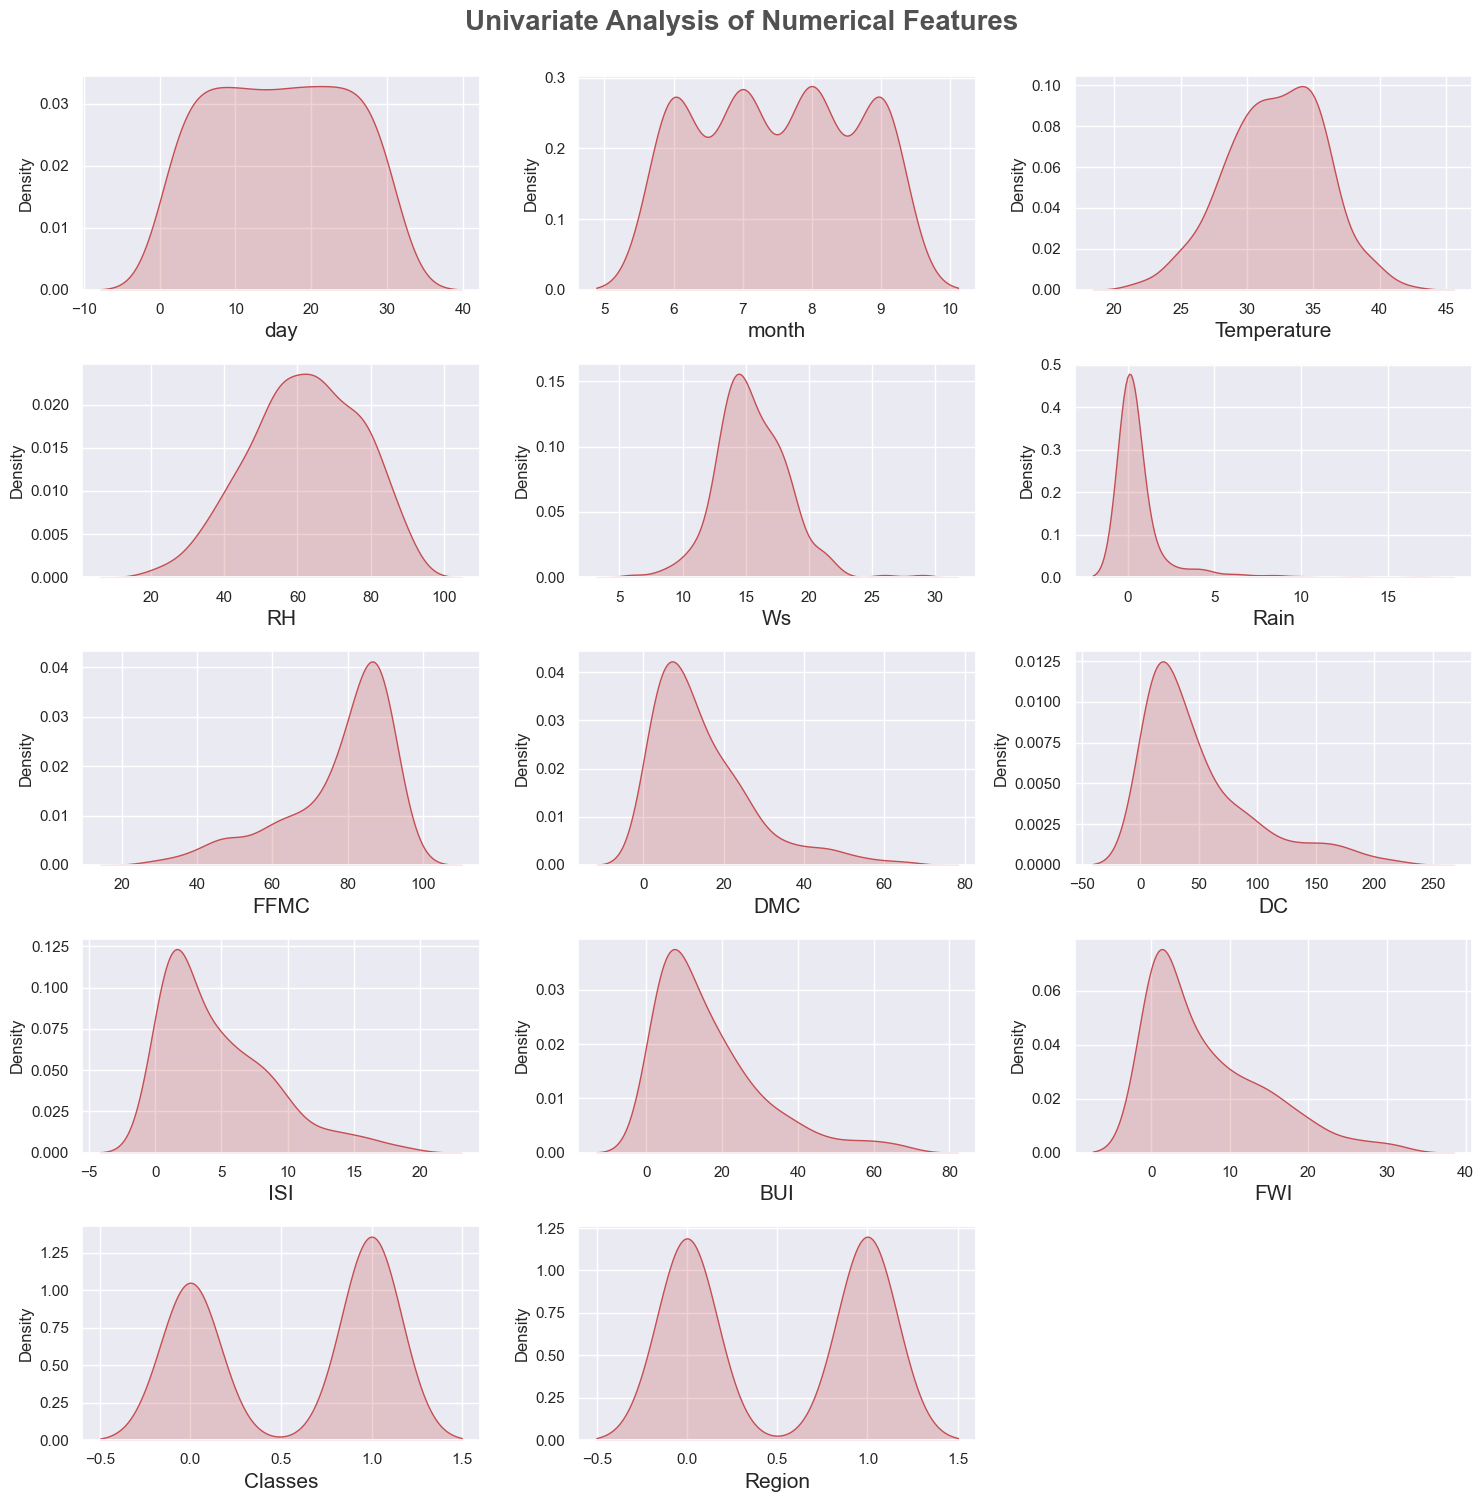

In [31]:
# For numerical features

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i], fontsize=15)
    plt.tight_layout()

**Observations:**

- We can see there is some skewness in the data.
- The `Rain`, `DMC`, `DC`, `ISI`, `BUI`, `FWI` are mainly right skewed.
- The `FFMC` is left skewed.
- The `Temperature`, `RH`, `WS` has almost normal distribution, although `WS` seems to have some right skewness and `RH` has some left skewness.
- The `Classes` and `Region` though have numeric value but they mainly represent categorical variables.
- The `day` and `month` are also not that much important.
- There are also outliers in many columns.

<AxesSubplot:>

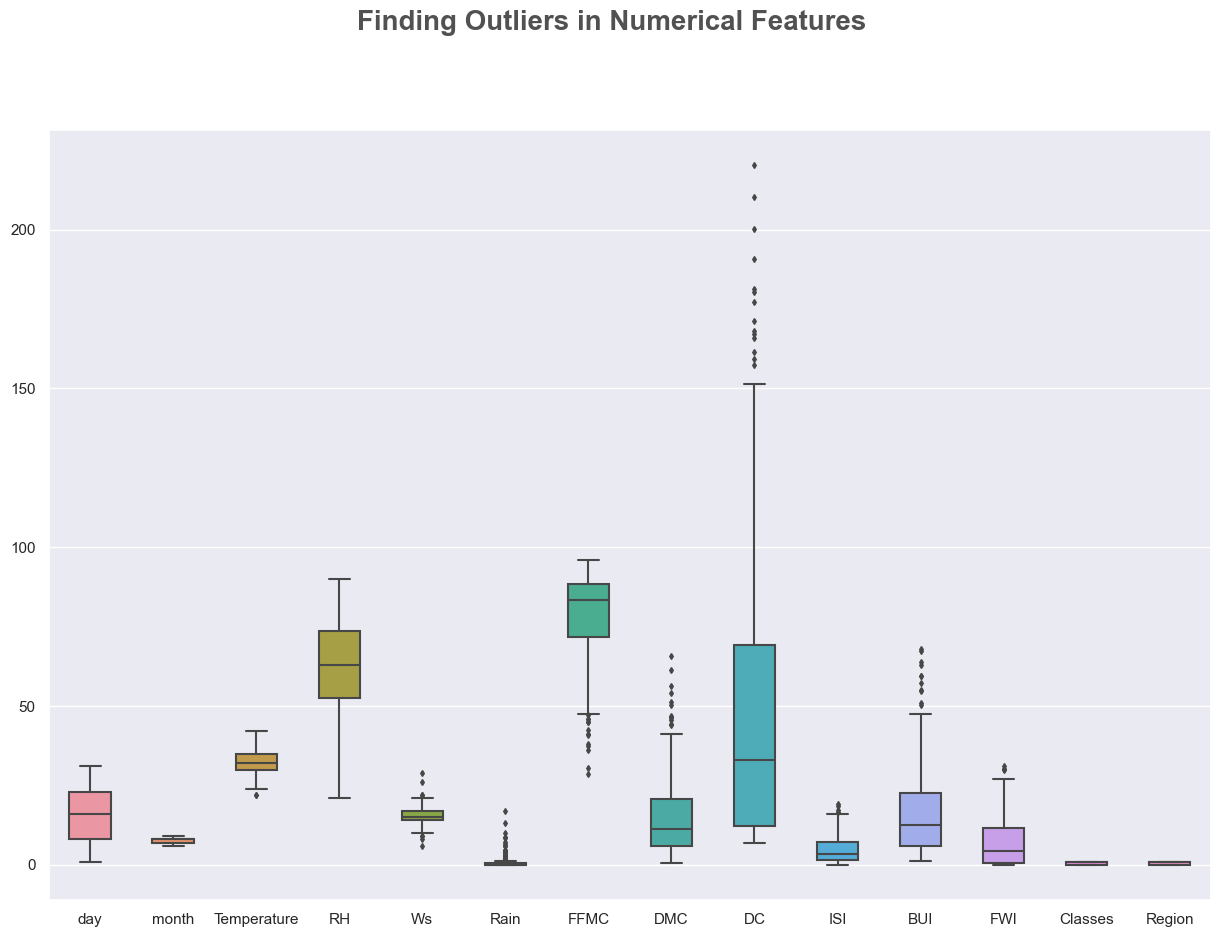

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle('Finding Outliers in Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.boxplot(data=df, width= 0.5, ax=ax, fliersize=3)

**Observations:**
- There is an outlier in the lower side of the `Temperature` feature.
- There are outliers in both side of the `Ws` feature.
- There are outliers only in the upper side of the `Rain`, `DMC`, `DC`, `ISI`, `BUI`, `FWI` features.
- There are outliers only in the lower side of the `FFMC` features.
- It seems the most number of outliers are in `DC` feature.
- There is no outliers in `day`, `month`, `RH`, `Classes` and `Region` features.

**Categorical Features**

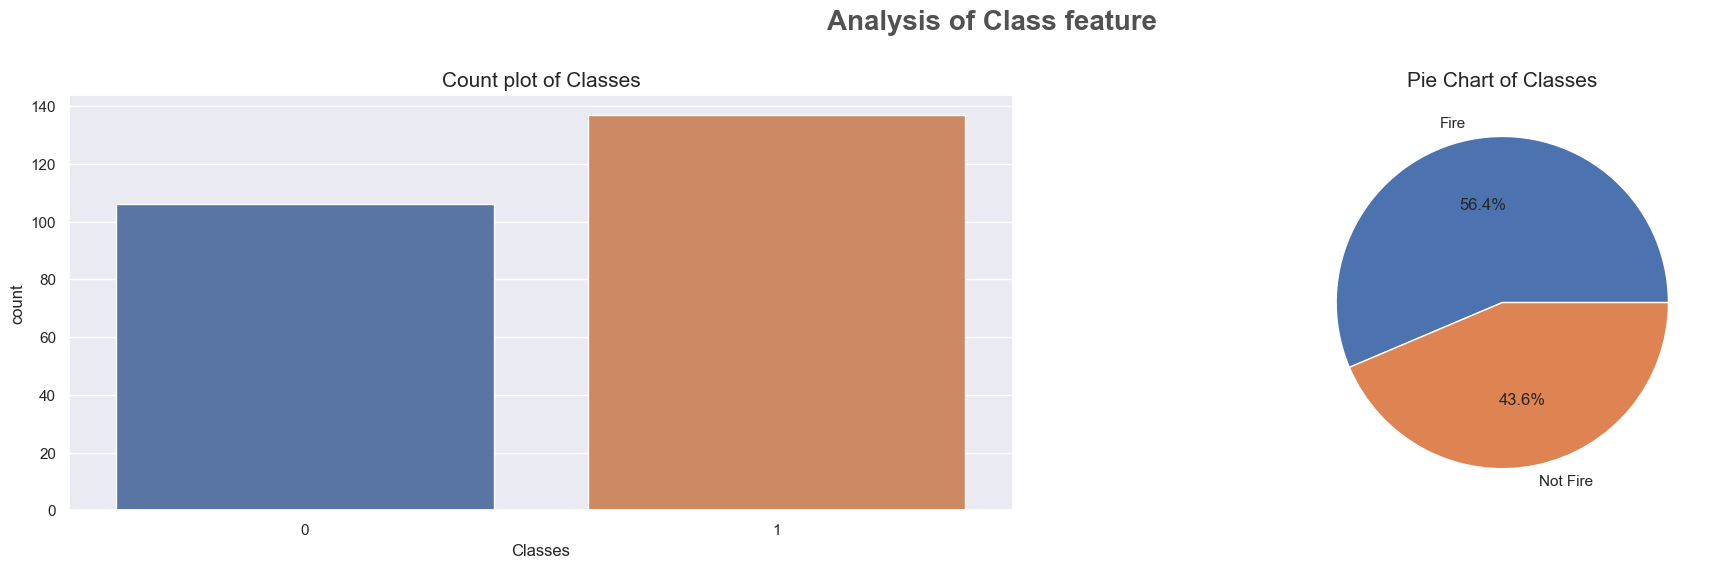

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.suptitle('Analysis of Class feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

plt.subplot(2, 2, 1)
sns.countplot(x=df['Classes'])
plt.title("Count plot of Classes", fontsize=15)

# percentage for pie chart
percentage=df.Classes.value_counts(normalize=True)*100

plt.subplot(2, 2, 2)
classes_labels=['Fire','Not Fire']
plt.pie(percentage, labels=classes_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)


plt.tight_layout()
plt.show()

**Observations:**
- From the above plots we can say that most times the fire has occured.
- Also we can say that the data in not imbalanced.

#### 4.3.2 Bivariate Analysis

- Bivariate analysis is the analysis of two variables to find out relationship between them.
- Here we will use lineplot to see the relationship between `Temperature` and other numerical variables leaving `Classes` and `Region`.

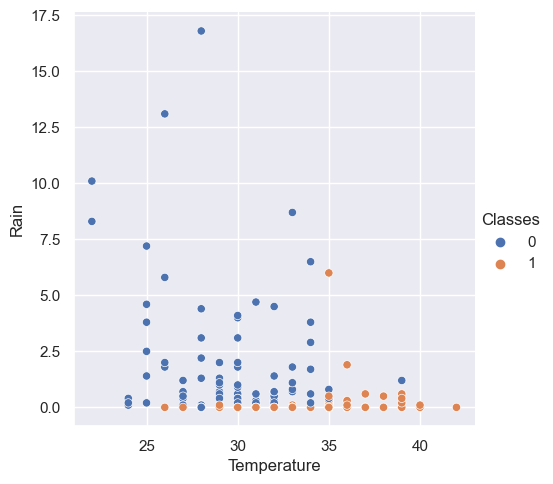

In [34]:
sns.relplot(x='Temperature', y='Rain', data=df, hue='Classes')

<AxesSubplot:xlabel='month', ylabel='count'>

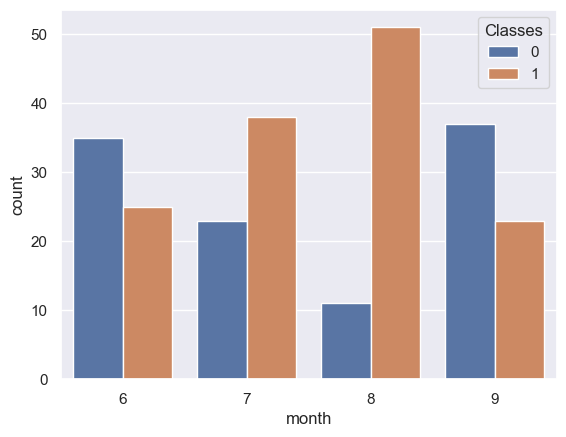

In [35]:
sns.countplot(x="month", hue="Classes", data=df)

**Observations:**
- Most fires occured when the rainfall is less than 2.5 mm and temperature is above 25 degrees.
- Also most number of fires occured in the months of 7 and 8 i.e. July and August.

In [36]:
# Creating a dataframe leaving the columns 'Classes' and 'Region', 'day' and 'month'

df_numeric = df[numerical_features]
df_numeric = df_numeric.iloc[:, :-2]
df_numeric.drop(columns=['day', 'month'], axis=1, inplace=True)
df_numeric.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI
0         29.0  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5
1         29.0  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4
2         26.0  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1
3         25.0  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0
4         27.0  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5

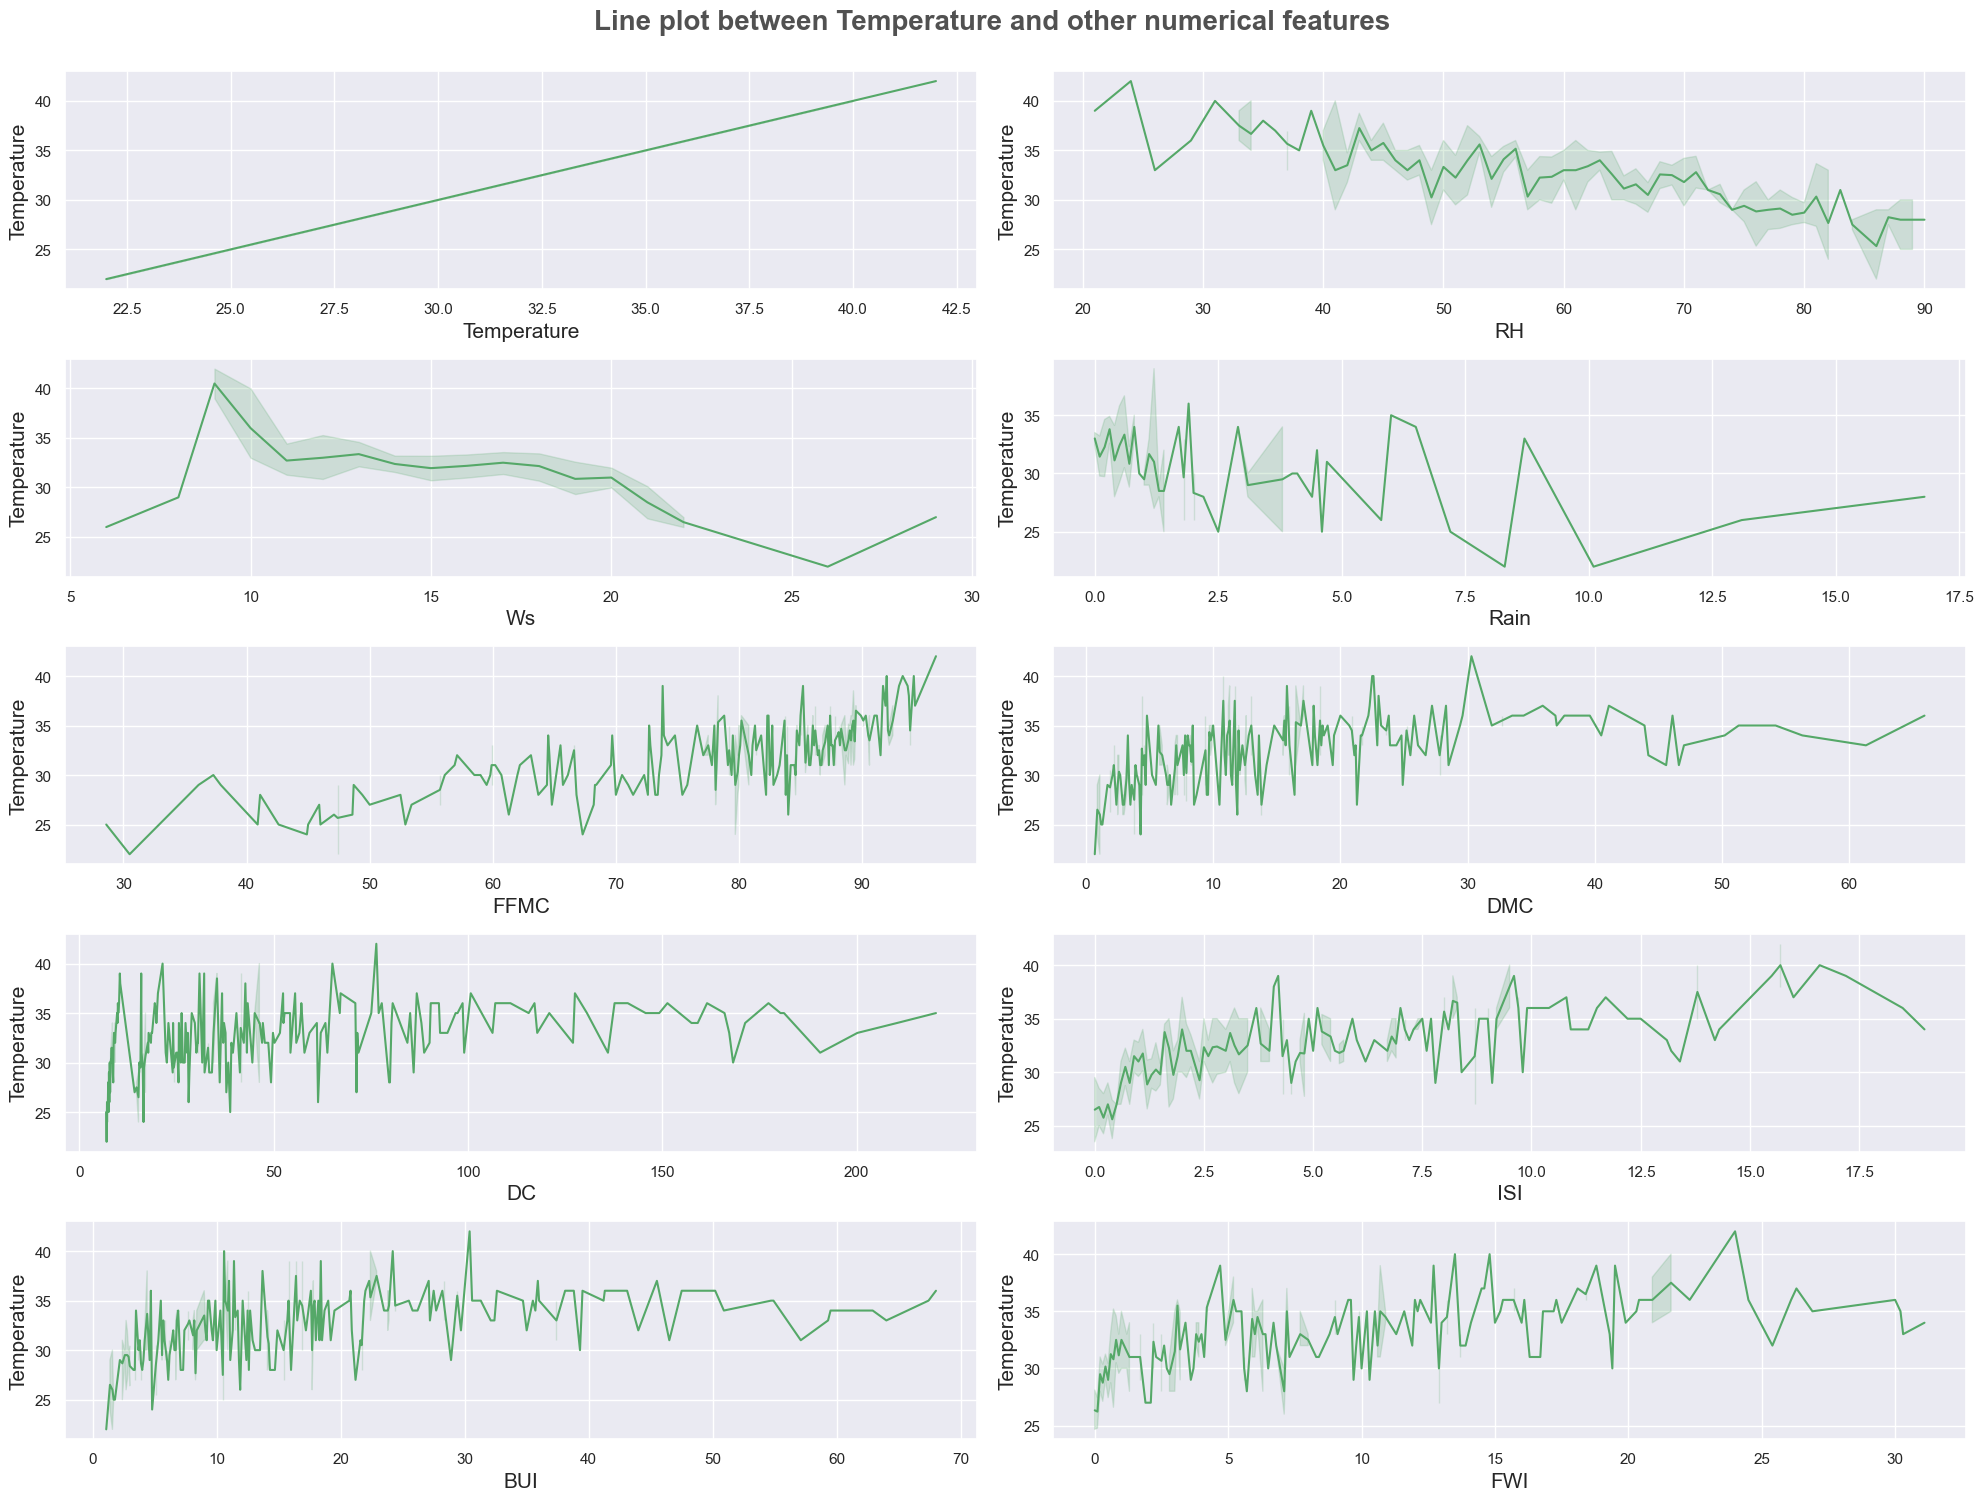

In [37]:
plt.figure(figsize=(20,15))
plt.suptitle('Line plot between Temperature and other numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

column_names = df_numeric.columns

for i in range(0, len(column_names)):
    plt.subplot(5, 2, i+1)
    sns.lineplot(y=df_numeric['Temperature'], x=df[column_names[i]], data=df_numeric, color='g')
    plt.ylabel("Temperature", fontsize=15)
    plt.xlabel(column_names[i], fontsize=15)
    plt.tight_layout()

**Observations:**
- The temperature decreases with increase in Relative humidity (RH).
- The temperature increases with increase in Fine Fuel Moisture Code (FFMC).
- The temperature decreases upto a certain point with increase in Wind speed (WS) then it starts to increase.
- The temperature flactuates with amount of Rain then after a certain point it starts to increase. Same happens with Drought Code (DC).
- After a certain point the temperature starts to decrease with increase in Initial Spread Index (ISI). At start it was flactuating.

#### 4.3.2 Multivariate Analysis

- Multivariate analysis is the analysis of more than one variable.


**Checking Multicollinearity in the numerical features**

In [38]:
df[list(df[numerical_features].columns)].corr()

day     month  Temperature        RH        Ws      Rain  \
day          1.000000 -0.000369     0.097227 -0.076034  0.047812 -0.112523   
month       -0.000369  1.000000    -0.056781 -0.041252 -0.039880  0.034822   
Temperature  0.097227 -0.056781     1.000000 -0.651400 -0.284510 -0.326492   
RH          -0.076034 -0.041252    -0.651400  1.000000  0.244048  0.222356   
Ws           0.047812 -0.039880    -0.284510  0.244048  1.000000  0.171506   
Rain        -0.112523  0.034822    -0.326492  0.222356  0.171506  1.000000   
FFMC         0.224956  0.017030     0.676568 -0.644873 -0.166548 -0.543906   
DMC          0.491514  0.067943     0.485687 -0.408519 -0.000721 -0.288773   
DC           0.527952  0.126511     0.376284 -0.226941  0.079135 -0.298023   
ISI          0.180543  0.065608     0.603871 -0.686667  0.008532 -0.347484   
BUI          0.517117  0.085073     0.459789 -0.353841  0.031438 -0.299852   
FWI          0.350781  0.082639     0.566670 -0.580957  0.032368 -0.324422   
Classes      0.202840  0.024004     0.516015 -0.432161 -0.069964 -0.379097   
Region      -0.000821 -0.001857    -0.269555  0.402682  0.181160  0.040013   

                 FFMC       DMC        DC       ISI       BUI       FWI  \
day          0.224956  0.491514  0.527952  0.180543  0.517117  0.350781   
month        0.017030  0.067943  0.126511  0.065608  0.085073  0.082639   
Temperature  0.676568  0.485687  0.376284  0.603871  0.459789  0.566670   
RH          -0.644873 -0.408519 -0.226941 -0.686667 -0.353841 -0.580957   
Ws          -0.166548 -0.000721  0.079135  0.008532  0.031438  0.032368   
Rain        -0.543906 -0.288773 -0.298023 -0.347484 -0.299852 -0.324422   
FFMC         1.000000  0.603608  0.507397  0.740007  0.592011  0.691132   
DMC          0.603608  1.000000  0.875925  0.680454  0.982248  0.875864   
DC           0.507397  0.875925  1.000000  0.508643  0.941988  0.739521   
ISI          0.740007  0.680454  0.508643  1.000000  0.644093  0.922895   
BUI          0.592011  0.982248  0.941988  0.644093  1.000000  0.857973   
FWI          0.691132  0.875864  0.739521  0.922895  0.857973  1.000000   
Classes      0.769492  0.585658  0.511123  0.735197  0.586639  0.719216   
Region      -0.222241 -0.192089  0.078734 -0.263197 -0.089408 -0.197102   

              Classes    Region  
day          0.202840 -0.000821  
month        0.024004 -0.001857  
Temperature  0.516015 -0.269555  
RH          -0.432161  0.402682  
Ws          -0.069964  0.181160  
Rain        -0.379097  0.040013  
FFMC         0.769492 -0.222241  
DMC          0.585658 -0.192089  
DC           0.511123  0.078734  
ISI          0.735197 -0.263197  
BUI          0.586639 -0.089408  
FWI          0.719216 -0.197102  
Classes      1.000000 -0.162347  
Region      -0.162347  1.000000

#### Graphical representation

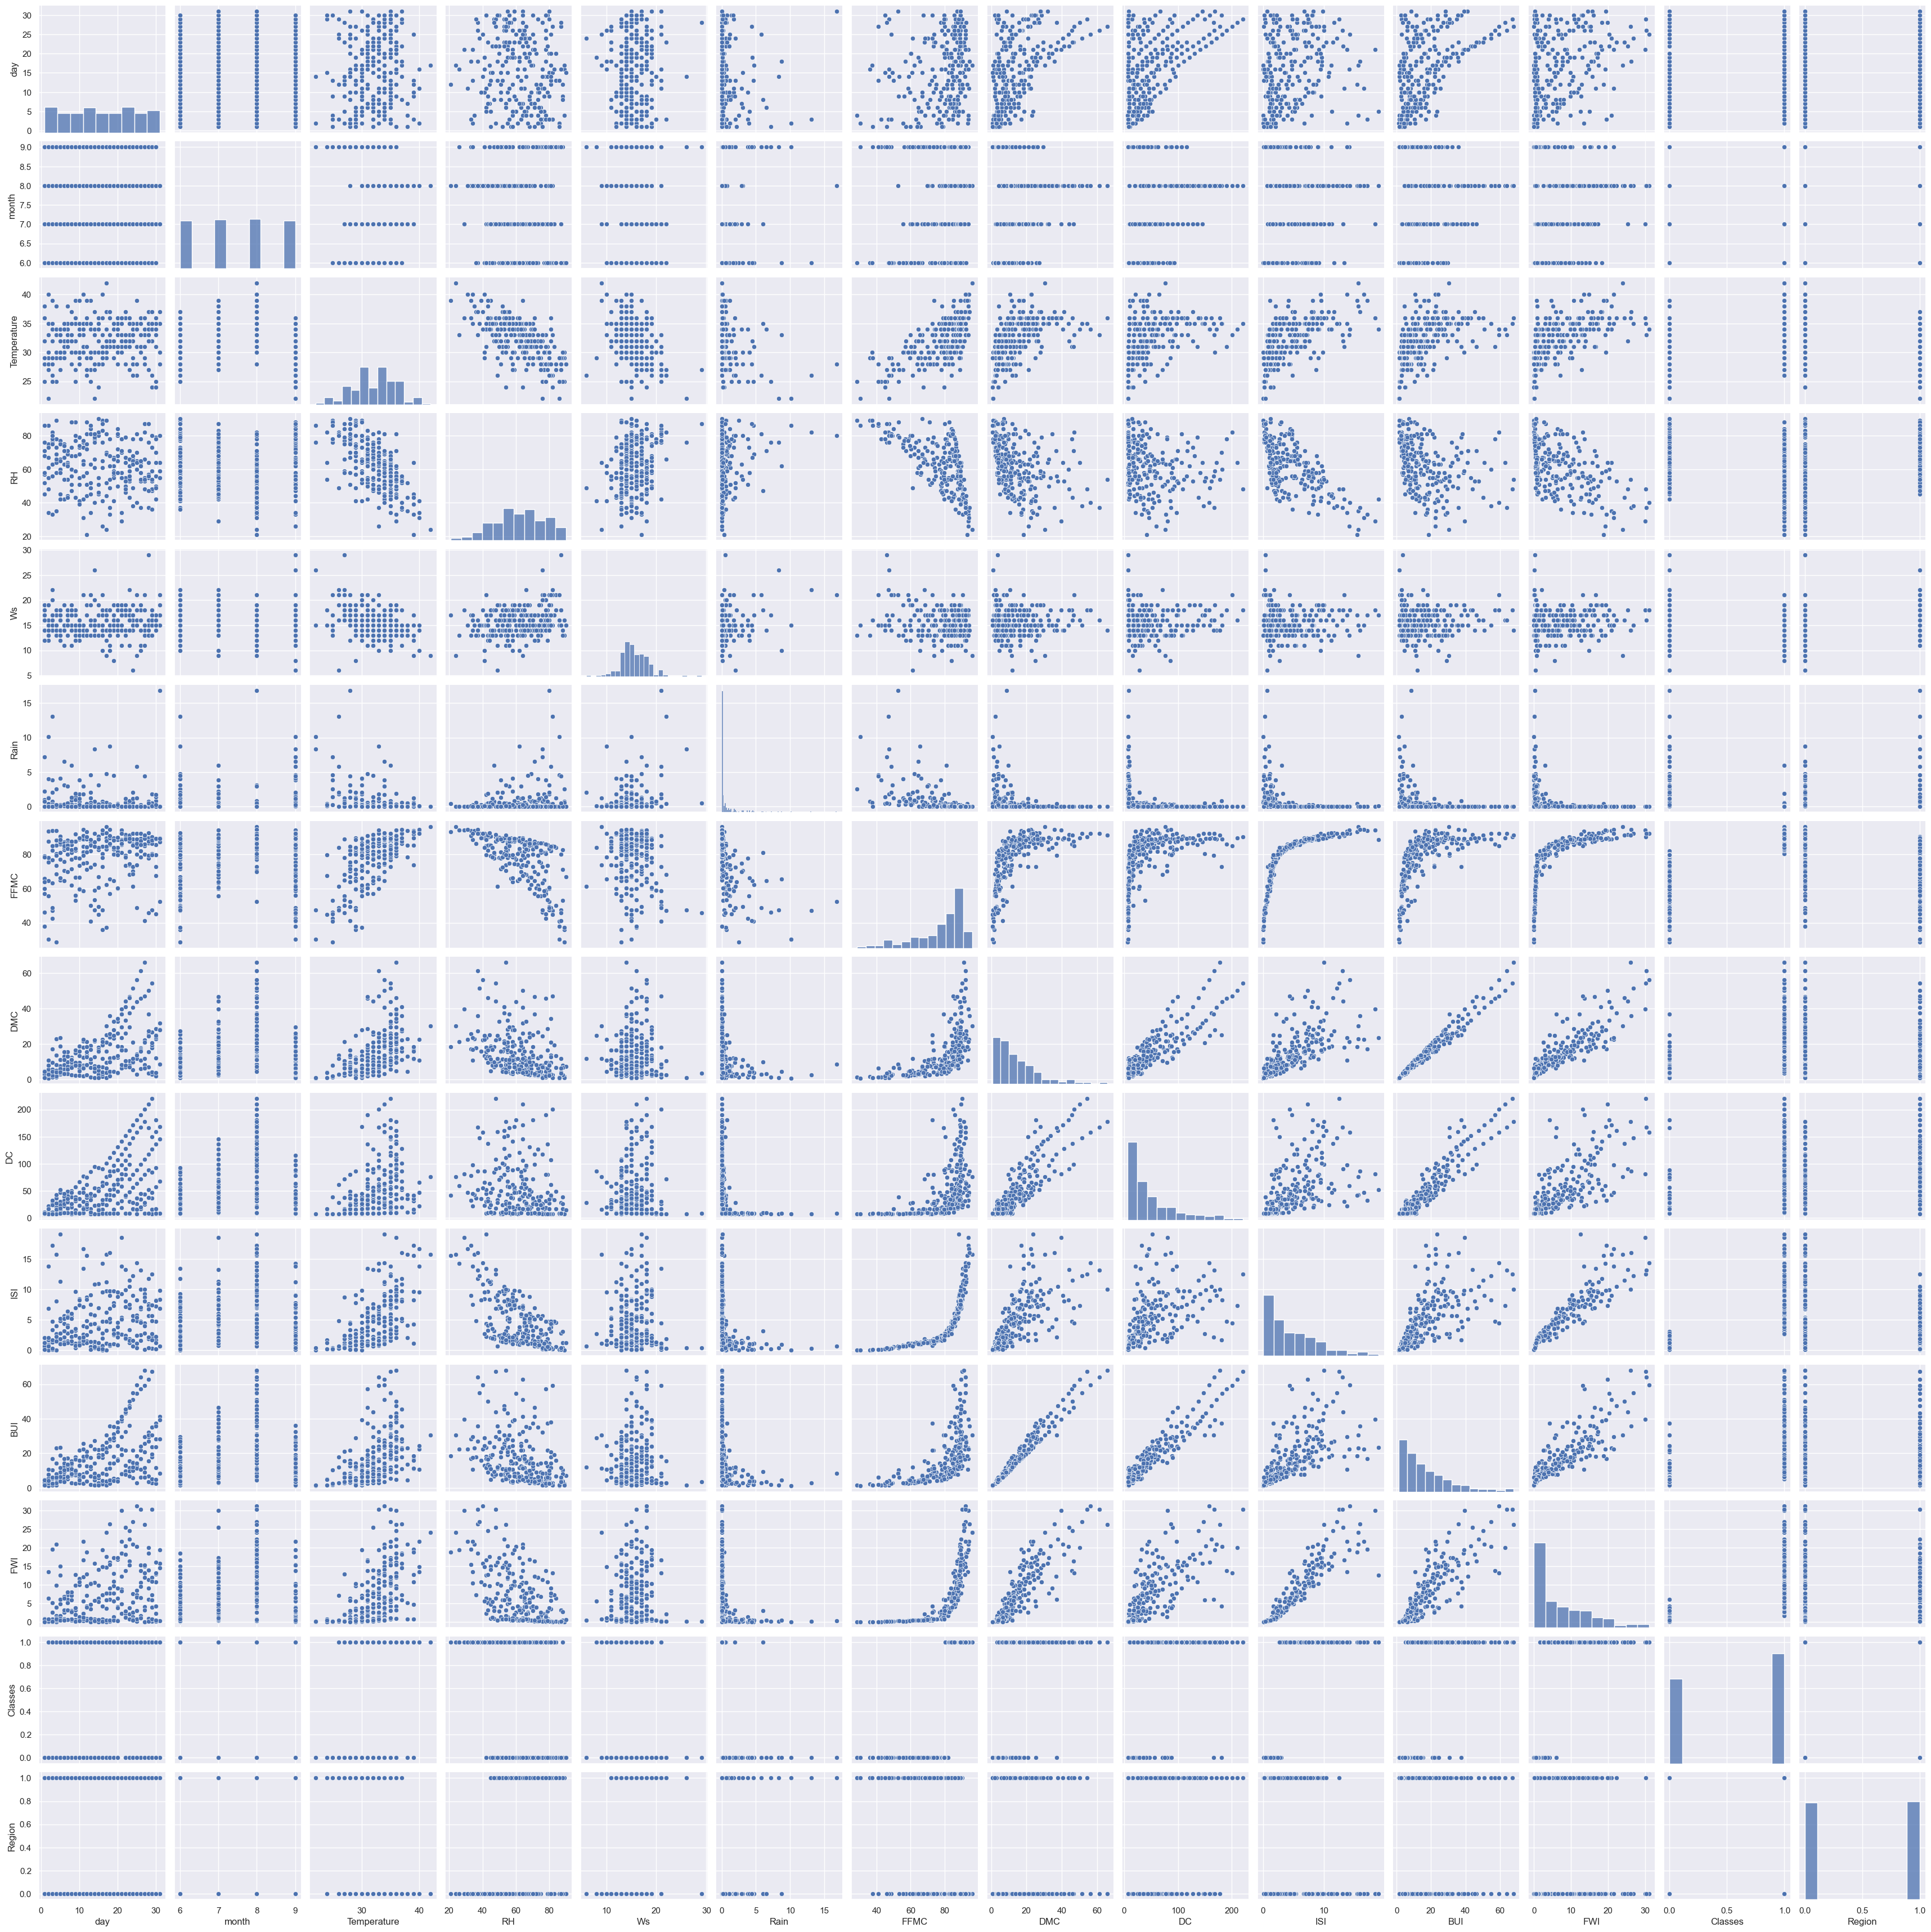

In [39]:
sns.pairplot(df[numerical_features])

<AxesSubplot:>

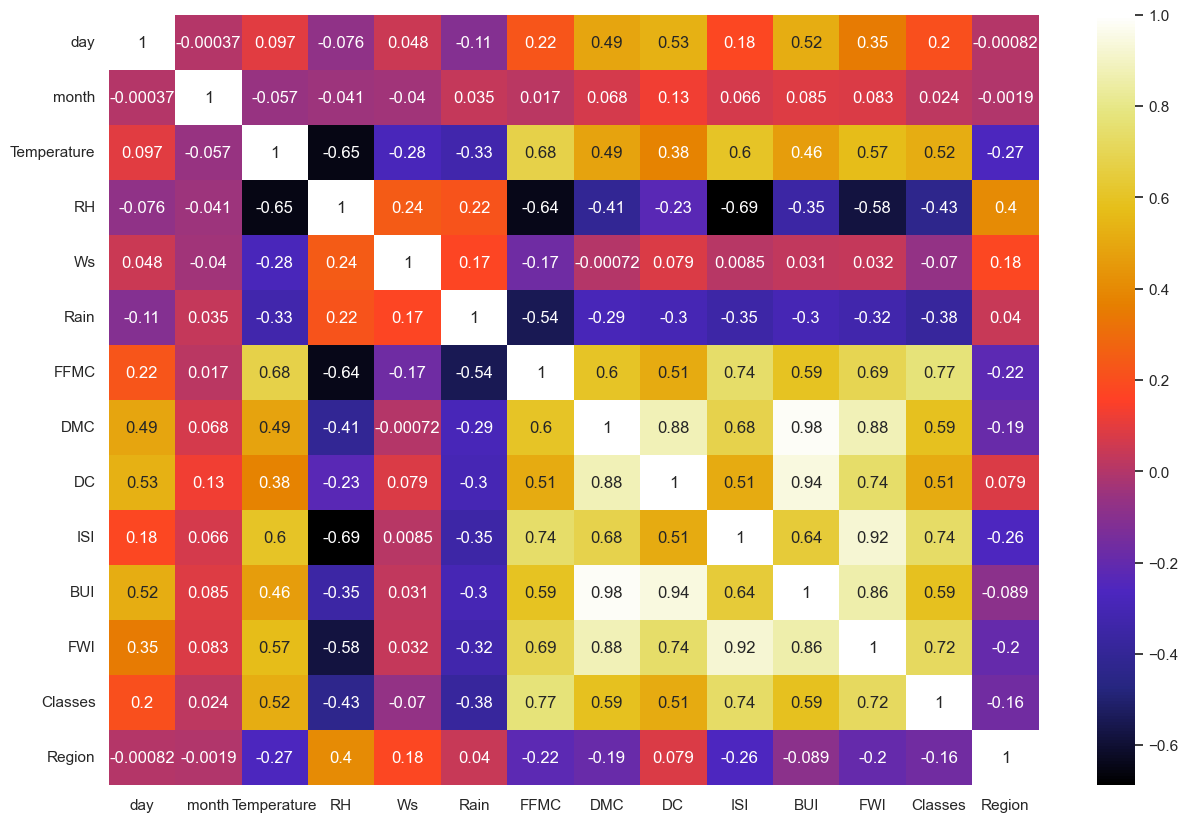

In [40]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df[numerical_features].corr(), cmap='CMRmap', annot=True)

**Observations:**
- `BUI` has high positive correlation with columns `DMC`, `DC` and `FWI`.
- `ISI` is very highly positively correlated with `FWI` and negatively correlated with `RH` and `Rain`.
- `DC` and `DMC` also positively correlated.
- `FWI` and `DMC` also positively correlated.
- `RH` and `FFMC` has negative correlation.

### 5. Data Pre-Processing

In [41]:
# Seeing the original cleaned dataset

df.head()

day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6         29.0  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6         29.0  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6         26.0  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6         25.0  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6         27.0  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes  Region  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        0       1

**Number of unique values in each column**

In [42]:
df.nunique()

day             31
month            4
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
Region           2
dtype: int64

#### 5.1 Separating Different Features

**Numerical features**

In [43]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f'Number of Numerical Features is {len(num_features)} and they are: \n{num_features}')

Number of Numerical Features is 14 and they are: 
['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


**Categorical features**

In [44]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'Number of Categorical Features is {len(cat_features)} and they are: \n{cat_features}')

Number of Categorical Features is 0 and they are: 
[]


**Discrete features**

In [45]:
dis_features = [feature for feature in num_features if len(df[feature].unique()) <= 10]
print(f'Number of Discrete Features is {len(dis_features)} and they are: \n{dis_features}')

Number of Discrete Features is 3 and they are: 
['month', 'Classes', 'Region']


**Continuous features**

In [46]:
con_features = [feature for feature in num_features if feature not in dis_features]
print(f'Number of Continuous Features is {len(con_features)} and they are: \n{con_features}')

Number of Continuous Features is 11 and they are: 
['day', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


#### 5.2 Outlier handling

**Detecting Outlier and Capping it**

- Trimming outliers may result in the removal of a large number of records from this dataset as we have already very less rows so this isn’t desirable in this case since columns other than the ones containing the outlier values may contain useful information.



- In this cases, we can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.

In [47]:
# Creating a function to detect outliers

def detect_outliers(col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("25percentile: ",percentile25)
    print("75percentile: ",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit: ",upper_limit)
    print("Lower limit: ",lower_limit)
    
    # replacing the outliers with the upper limit and lower limit values
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [48]:
# Now applying the function on columns

for col in con_features:
         detect_outliers(col)


 #### day ####
25percentile:  8.0
75percentile:  23.0
Upper limit:  45.5
Lower limit:  -14.5

 #### Temperature ####
25percentile:  30.0
75percentile:  35.0
Upper limit:  42.5
Lower limit:  22.5

 #### RH ####
25percentile:  52.5
75percentile:  73.5
Upper limit:  105.0
Lower limit:  21.0

 #### Ws ####
25percentile:  14.0
75percentile:  17.0
Upper limit:  21.5
Lower limit:  9.5

 #### Rain ####
25percentile:  0.0
75percentile:  0.5
Upper limit:  1.25
Lower limit:  -0.75

 #### FFMC ####
25percentile:  71.85
75percentile:  88.3
Upper limit:  112.975
Lower limit:  47.17499999999999

 #### DMC ####
25percentile:  5.8
75percentile:  20.799999999999997
Upper limit:  43.29999999999999
Lower limit:  -16.699999999999992

 #### DC ####
25percentile:  12.35
75percentile:  69.1
Upper limit:  154.22499999999997
Lower limit:  -72.77499999999999

 #### ISI ####
25percentile:  1.4
75percentile:  7.25
Upper limit:  16.025
Lower limit:  -7.374999999999998

 #### BUI ####
25percentile:  6.0
75percentil

**Checking Skewness after Outlier Capping**

In [49]:
df[con_features].skew(axis=0, skipna=True)

day            0.000365
Temperature   -0.170656
RH            -0.242790
Ws             0.186602
Rain           1.241294
FFMC          -1.082654
DMC            1.091065
DC             1.184410
ISI            1.031482
BUI            1.024216
FWI            1.058205
dtype: float64

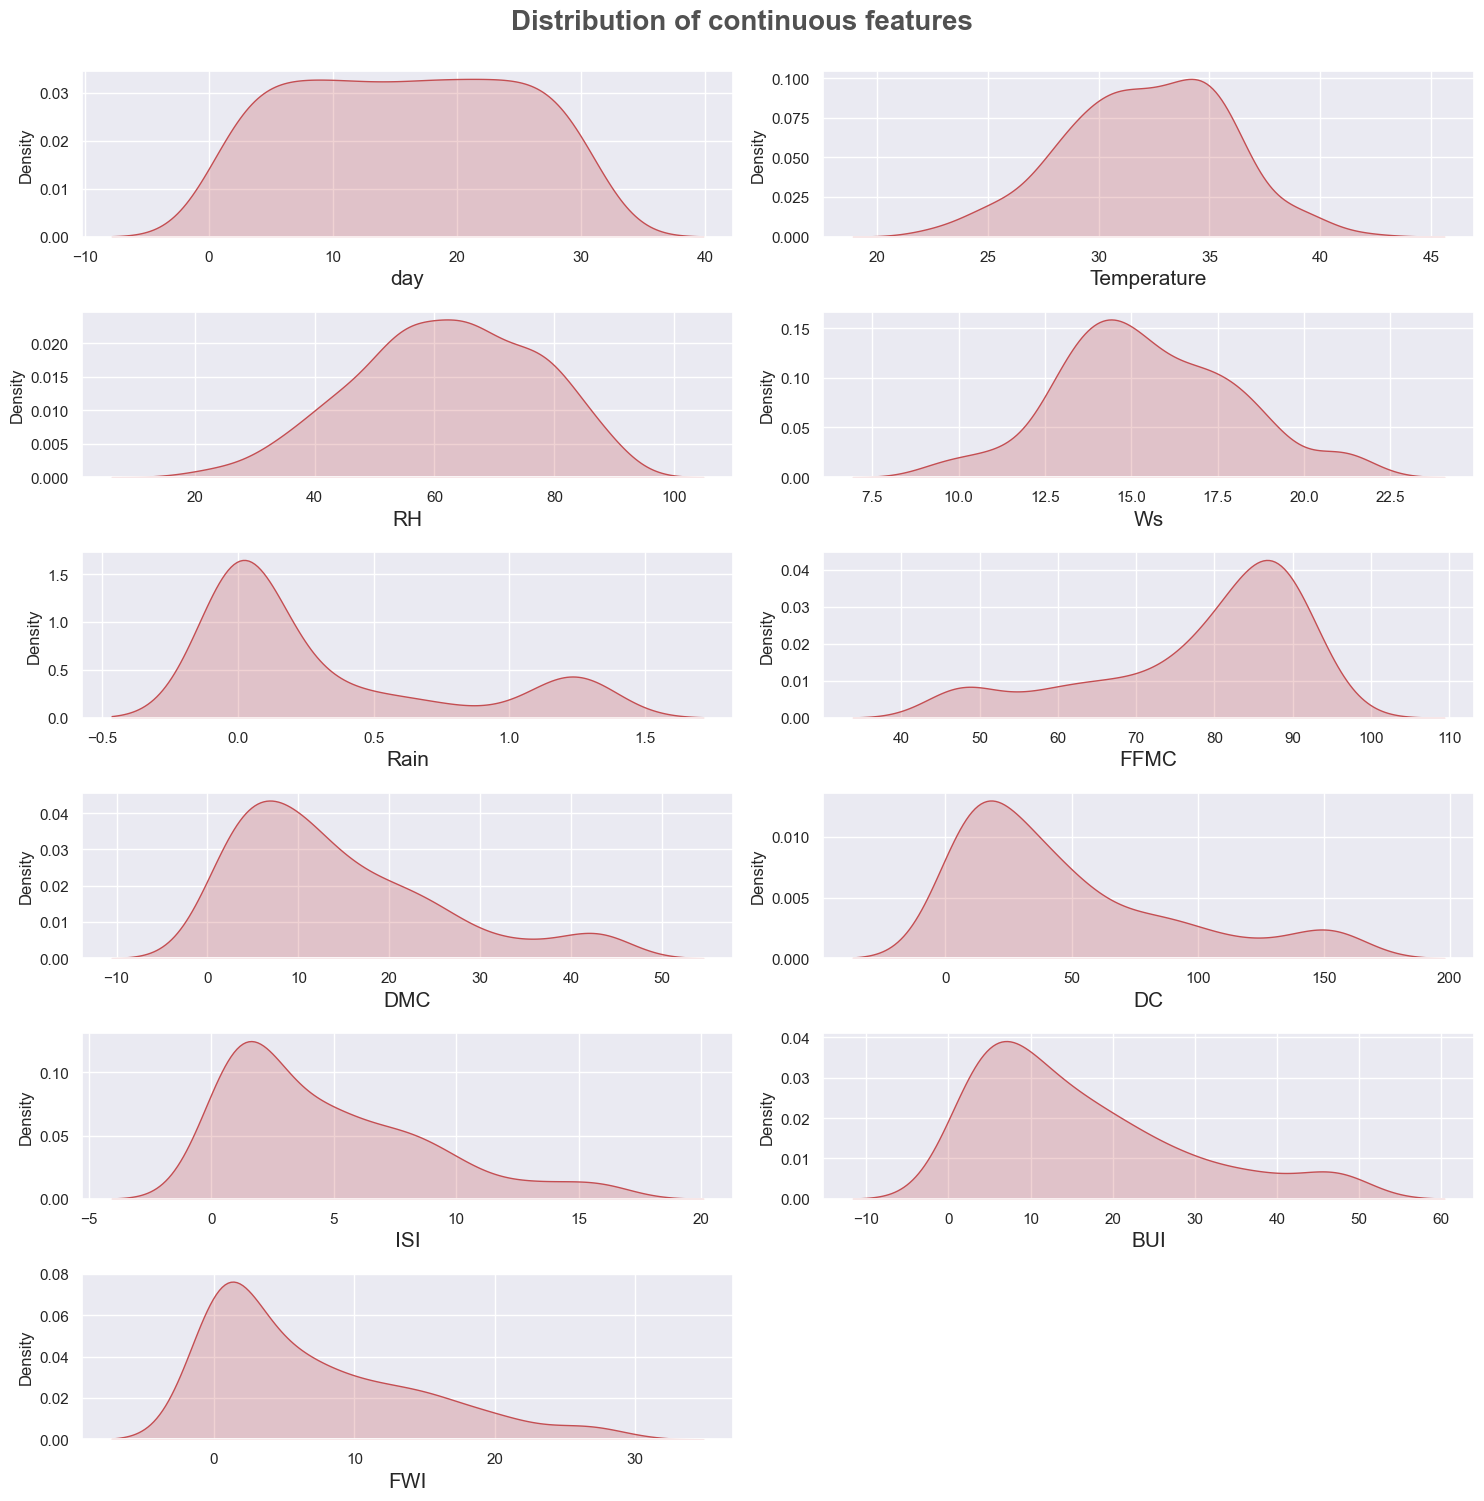

In [50]:
# Again For continuous features

plt.figure(figsize=(15, 15))
plt.suptitle('Distribution of continuous features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(con_features)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x=df[con_features[i]],shade=True, color='r')
    plt.xlabel(con_features[i], fontsize=15)
    plt.tight_layout()

<AxesSubplot:>

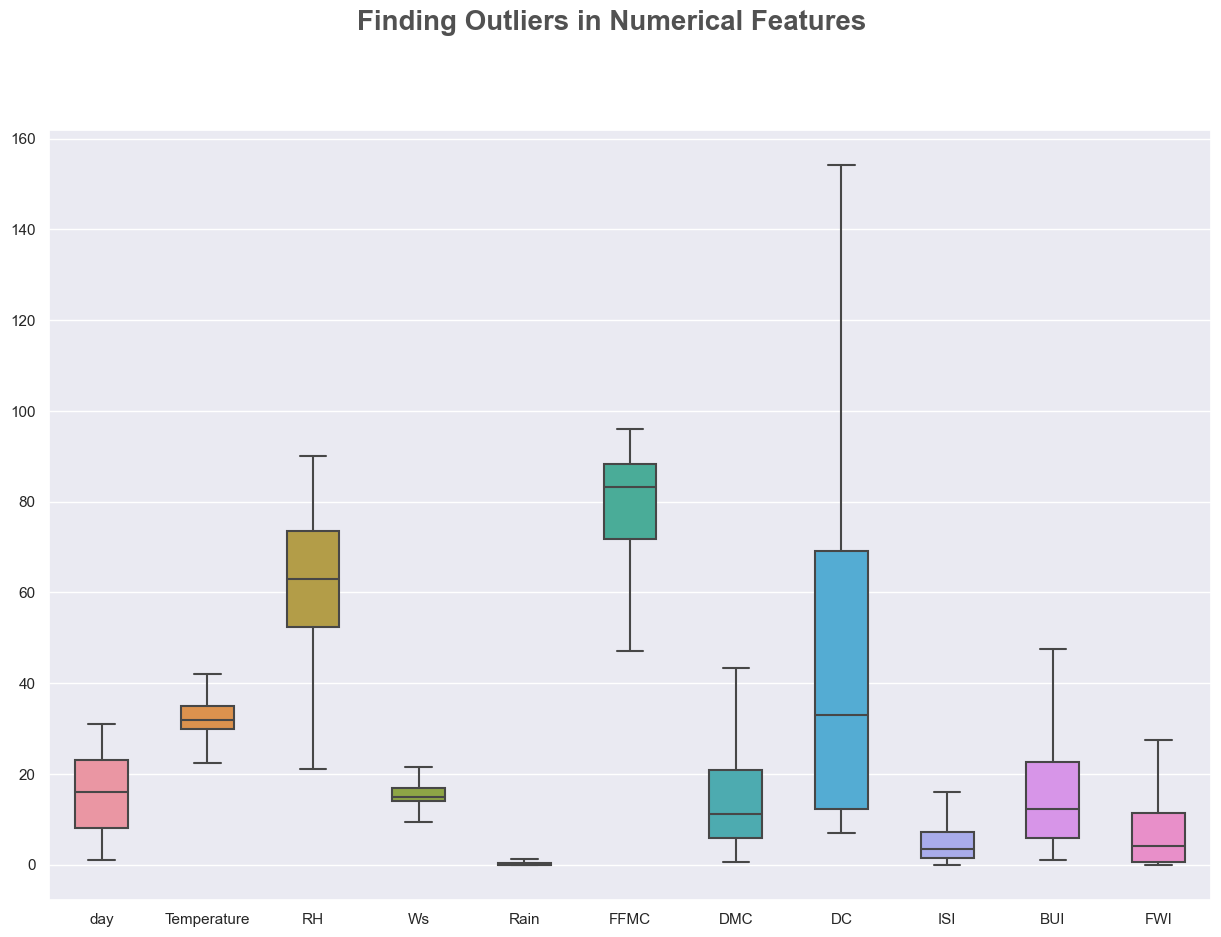

In [51]:
fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle('Finding Outliers in Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.boxplot(data=df[con_features], width= 0.5, ax=ax, fliersize=3)

**Observations:**
- Now we can see all the outliers are capped.
- Also the distribution remains almost as same as it was with the outliers.

**Adding the continuous and discrete features into the final dataset**

In [52]:
df_final = pd.concat([df[con_features], df[dis_features]], axis=1)
df_final.head()

day  Temperature  RH    Ws  Rain    FFMC  DMC    DC  ISI  BUI  FWI  month  \
0  1.0         29.0  57  18.0  0.00  65.700  3.4   7.6  1.3  3.4  0.5      6   
1  2.0         29.0  61  13.0  1.25  64.400  4.1   7.6  1.0  3.9  0.4      6   
2  3.0         26.0  82  21.5  1.25  47.175  2.5   7.1  0.3  2.7  0.1      6   
3  4.0         25.0  89  13.0  1.25  47.175  1.3   6.9  0.0  1.7  0.0      6   
4  5.0         27.0  77  16.0  0.00  64.800  3.0  14.2  1.2  3.9  0.5      6   

   Classes  Region  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        0       1

In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   Temperature  243 non-null    float64
 2   RH           243 non-null    int64  
 3   Ws           243 non-null    float64
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  month        243 non-null    int64  
 12  Classes      243 non-null    int64  
 13  Region       243 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 36.6 KB


In [54]:
# Changing the day column back to int

df_final['day'] = df_final['day'].astype(int)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   Temperature  243 non-null    float64
 2   RH           243 non-null    int64  
 3   Ws           243 non-null    float64
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  month        243 non-null    int64  
 12  Classes      243 non-null    int64  
 13  Region       243 non-null    int64  
dtypes: float64(9), int32(1), int64(4)
memory usage: 35.6 KB


In [55]:
df_final.head()

day  Temperature  RH    Ws  Rain    FFMC  DMC    DC  ISI  BUI  FWI  month  \
0    1         29.0  57  18.0  0.00  65.700  3.4   7.6  1.3  3.4  0.5      6   
1    2         29.0  61  13.0  1.25  64.400  4.1   7.6  1.0  3.9  0.4      6   
2    3         26.0  82  21.5  1.25  47.175  2.5   7.1  0.3  2.7  0.1      6   
3    4         25.0  89  13.0  1.25  47.175  1.3   6.9  0.0  1.7  0.0      6   
4    5         27.0  77  16.0  0.00  64.800  3.0  14.2  1.2  3.9  0.5      6   

   Classes  Region  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        0       1

#### 5.3 Creating independent and dependent variables

In [56]:
# Creating a copy of the final dataset

df_copy = df_final.copy()
df_copy.head()

day  Temperature  RH    Ws  Rain    FFMC  DMC    DC  ISI  BUI  FWI  month  \
0    1         29.0  57  18.0  0.00  65.700  3.4   7.6  1.3  3.4  0.5      6   
1    2         29.0  61  13.0  1.25  64.400  4.1   7.6  1.0  3.9  0.4      6   
2    3         26.0  82  21.5  1.25  47.175  2.5   7.1  0.3  2.7  0.1      6   
3    4         25.0  89  13.0  1.25  47.175  1.3   6.9  0.0  1.7  0.0      6   
4    5         27.0  77  16.0  0.00  64.800  3.0  14.2  1.2  3.9  0.5      6   

   Classes  Region  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        0       1

In [57]:
# Here 'X' is independent features and 'y' is dependent feature.

y = df_copy['Classes']
X = df_copy.drop(columns=['Classes'], axis=1)

In [58]:
X.head()

day  Temperature  RH    Ws  Rain    FFMC  DMC    DC  ISI  BUI  FWI  month  \
0    1         29.0  57  18.0  0.00  65.700  3.4   7.6  1.3  3.4  0.5      6   
1    2         29.0  61  13.0  1.25  64.400  4.1   7.6  1.0  3.9  0.4      6   
2    3         26.0  82  21.5  1.25  47.175  2.5   7.1  0.3  2.7  0.1      6   
3    4         25.0  89  13.0  1.25  47.175  1.3   6.9  0.0  1.7  0.0      6   
4    5         27.0  77  16.0  0.00  64.800  3.0  14.2  1.2  3.9  0.5      6   

   Region  
0       1  
1       1  
2       1  
3       1  
4       1

In [59]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

**Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.**

**Strip Plot**

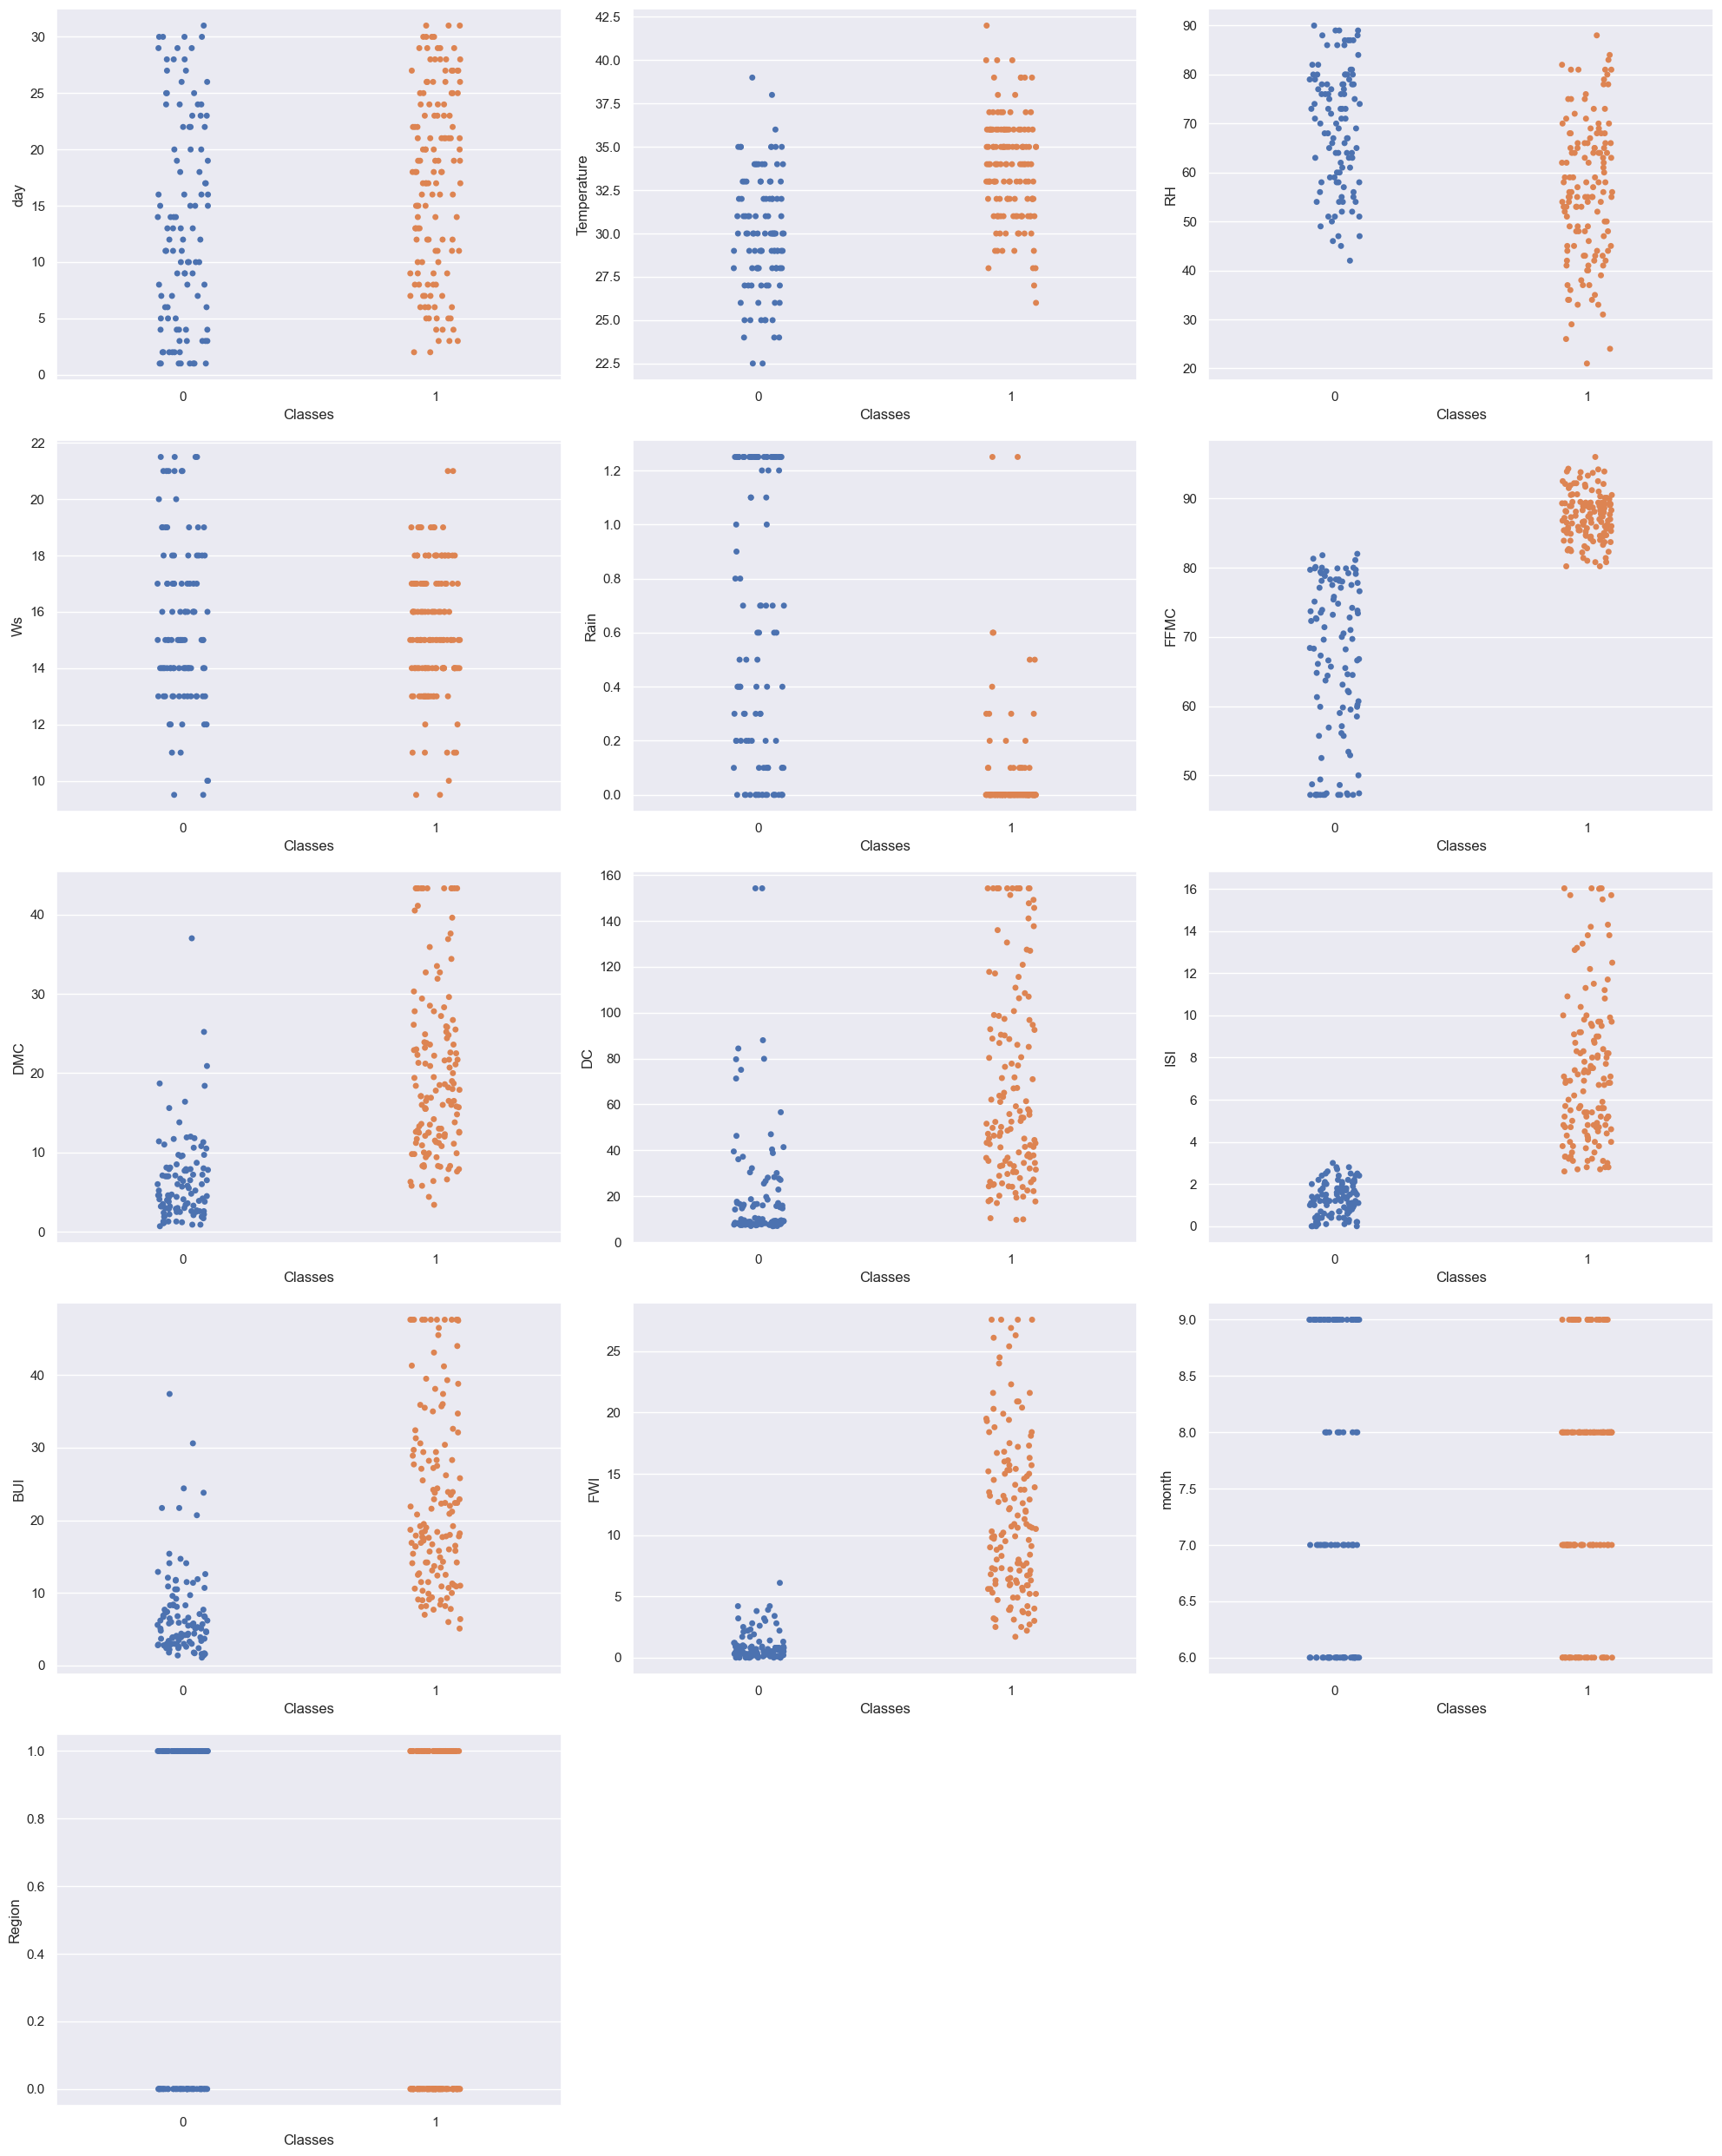

In [60]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    ax = plt.subplot(5,3,plotnumber)
    sns.stripplot(y, X[column])
    plotnumber+=1
plt.tight_layout()

**Observations:**
- Most number of fire occured when temperature is between 30 and 37 degree.
- For Relative humidity 40 to 70 and wind speed between 13 to 19 km/hr, most number of cases of fire occured.
- Regions having rainfall less than 1 mm is more prone to fire.
- For FFMC >80, most number of fire occured.

#### 5.4 Standardizing or feature scaling the dataset (Feature Engineering)

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [62]:
# scalling of data for features in X

X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.67279579, -0.8745147 , -0.34067323, ..., -0.89058224,
        -1.35016751,  0.99589321],
       [-1.55947285, -0.8745147 , -0.07035945, ..., -0.90430697,
        -1.35016751,  0.99589321],
       [-1.44614991, -1.70570273,  1.34878787, ..., -0.94548115,
        -1.35016751,  0.99589321],
       ...,
       [ 1.38692352, -1.42864006,  1.68668009, ..., -0.93175642,
         1.34646842, -1.00412373],
       [ 1.50024646, -2.25982809, -0.54340856, ..., -0.86313279,
         1.34646842, -1.00412373],
       [ 1.6135694 , -2.25982809,  0.13237588, ..., -0.89058224,
         1.34646842, -1.00412373]])

**check for multicollinearity using VIF(Variance Inflation factor)**

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# multicollinearity

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

vif     Features
0     1.532477          day
1     2.541074  Temperature
2     3.599228           RH
3     1.333700           Ws
4     3.451027         Rain
5     7.429418         FFMC
6    69.476291          DMC
7    24.280877           DC
8    30.049575          ISI
9   146.767696          BUI
10   46.795758          FWI
11    1.096202        month
12    1.562188       Region

**Observations:**
- The features `DMC`, `DC`, `ISI`, `BUI`, `FWI` are highly correlated.

In [64]:
# importing library to do test train split

from sklearn.model_selection import train_test_split

In [65]:
# Creating the test and train dataset

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=355)

**Let's check the shapes of each datasets**

In [66]:
X_train.shape

(182, 13)

In [67]:
y_train.shape

(182,)

In [68]:
X_test.shape

(61, 13)

In [69]:
y_test.shape

(61,)

**Observations:**

- Now we have 182 rows for training and 61 for test datasets.

### 6. Model Training

### 6.1 Simple Logistic Regression model


#### 6.1 Training the model

In [70]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

#### 6.2 Prediction for the test data

In [71]:
log_reg_pred = log_reg.predict(X_test)
log_reg_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

**Intercept and Coefficient**

In [72]:
print('Intercept is :',log_reg.intercept_)
print('\nCoefficient is :',log_reg.coef_)

Intercept is : [1.3673836]

Coefficient is : [[-0.25637809  0.081233    0.03452035  0.05098355 -0.27228075  2.28538039
  -0.18874121  0.10495099  2.30009164  0.38002963  1.81356051 -0.06166864
  -0.11687791]]


In [73]:
print("Training Score:",log_reg.score(X_train, y_train))
print("\nTest Score:",log_reg.score(X_test,y_test))

Training Score: 0.978021978021978

Test Score: 0.9672131147540983


**Observations:**
- So there is no overfitting or underfitting condition.

### 7. Choosing the best model

#### 7.1 Performance metrics

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix

In [75]:
accuracy_score(y_test,log_reg_pred)

0.9672131147540983

In [76]:
# creating a Confusion Matrix


conf_mat = confusion_matrix(y_test, log_reg_pred)
conf_mat

array([[27,  0],
       [ 2, 32]], dtype=int64)

In [77]:
# Distributing the values for the TP, TN, FP, FN from the confusion matrix

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [78]:
# Checking Accuracy

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9672131147540983

In [79]:
# Checking Precison

Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [80]:
# Checking Recall

Recall = true_positive/(true_positive+false_negative)
Recall

0.9310344827586207

In [81]:
# Checking F1 Score

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9642857142857143

In [82]:
#Classification report

print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.94      0.97        34

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



**Observations:**
- The accuracy of the model is 96%.

## Now for imbalanced dataset

### 1. Creating the imbalanced dataset


- Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

In [84]:
# importing the final dataset

df_final

day  Temperature  RH    Ws  Rain    FFMC   DMC    DC  ISI   BUI  FWI  \
0      1         29.0  57  18.0  0.00  65.700   3.4   7.6  1.3   3.4  0.5   
1      2         29.0  61  13.0  1.25  64.400   4.1   7.6  1.0   3.9  0.4   
2      3         26.0  82  21.5  1.25  47.175   2.5   7.1  0.3   2.7  0.1   
3      4         25.0  89  13.0  1.25  47.175   1.3   6.9  0.0   1.7  0.0   
4      5         27.0  77  16.0  0.00  64.800   3.0  14.2  1.2   3.9  0.5   
..   ...          ...  ..   ...   ...     ...   ...   ...  ...   ...  ...   
241   26         30.0  65  14.0  0.00  85.400  16.0  44.5  4.5  16.9  6.5   
242   27         28.0  87  15.0  1.25  47.175   6.5   8.0  0.1   6.2  0.0   
243   28         27.0  87  21.5  0.50  47.175   3.5   7.9  0.4   3.4  0.2   
244   29         24.0  54  18.0  0.10  79.700   4.3  15.2  1.7   5.1  0.7   
245   30         24.0  64  15.0  0.20  67.300   3.8  16.5  1.2   4.8  0.5   

     month  Classes  Region  
0        6        0       1  
1        6        0       1  
2        6        0       1  
3        6        0       1  
4        6        0       1  
..     ...      ...     ...  
241      9        1       0  
242      9        0       0  
243      9        0       0  
244      9        0       0  
245      9        0       0  

[243 rows x 14 columns]

In [85]:
# checking the shape of the dataset

df_final.shape

(243, 14)

In [86]:
# output of original dataset

df_final.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

**Observations:**

- In this dataset the target variable is the feature `Classes`.
- Right now the distribution is for `fire` there are 137 observations and for `not fire` there are 106 observations. 
- Though it is slightly skewed towards `fire` but it cannot be said to be an imbalanced dataset.

In [90]:
# creating independent and dependent features like before

X1 = df_final.drop(columns = ['Classes'], axis=1)
y1 = df_final['Classes']

In [91]:
X1.head()

day  Temperature  RH    Ws  Rain    FFMC  DMC    DC  ISI  BUI  FWI  month  \
0    1         29.0  57  18.0  0.00  65.700  3.4   7.6  1.3  3.4  0.5      6   
1    2         29.0  61  13.0  1.25  64.400  4.1   7.6  1.0  3.9  0.4      6   
2    3         26.0  82  21.5  1.25  47.175  2.5   7.1  0.3  2.7  0.1      6   
3    4         25.0  89  13.0  1.25  47.175  1.3   6.9  0.0  1.7  0.0      6   
4    5         27.0  77  16.0  0.00  64.800  3.0  14.2  1.2  3.9  0.5      6   

   Region  
0       1  
1       1  
2       1  
3       1  
4       1

In [92]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

**To make the data imbalanced we will make the test dataset 10% of the entire dataset.**

In [93]:
# again creating train test split like before

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X1, y1, test_size=0.10, random_state=355)

In [97]:
X_train_imb.shape

(218, 13)

In [98]:
y_train_imb.shape

(218,)

In [99]:
X_test_imb.shape

(25, 13)

In [100]:
y_test_imb.shape

(25,)

**Observations:**

- Now the test dataset has 25 rows and train dataset has 218 rows.

**Now we will replace all the values 0 to 1 in dependent variable `Y_train_imb` and replace all the values 1 to 0 in dependent variable `y_test_imb` to create the imbalance.**

In [101]:
y_train_imb = y_train_imb.replace(0,1)
y_test_imb = y_test_imb.replace(1,0)

- **Now Joining `X_train_imb` and `y_train_imb` to create the imbalanced train data and also `X_test_imb` and `y_test_imb` to create the imbalanced test data.**
- **Then Concatinate that train and test datasets to create the actual imbalanced dataset.**

In [102]:
train_imb = X_train_imb.join(pd.DataFrame(y_train_imb))
test_imb = X_test_imb.join(pd.DataFrame(y_test_imb))
imb_data = pd.concat([train_imb, test_imb])
imb_data.head()

day  Temperature  RH    Ws  Rain  FFMC   DMC       DC   ISI     BUI  \
120   29         26.0  80  16.0  1.25  47.4   2.9    7.700   0.3   3.000   
89    29         35.0  48  18.0  0.00  90.1  43.3  154.225  12.5  47.625   
100    9         30.0  77  15.0  1.00  56.1   2.1    8.400   0.7   2.600   
27    28         32.0  55  14.0  0.00  89.1  25.5   88.500   7.6  29.700   
219    4         30.0  66  15.0  0.20  73.5   4.1   26.600   1.5   6.000   

        FWI  month  Region  Classes  
120   0.100      9       1        1  
89   27.575      8       1        1  
100   0.200      9       1        1  
27   13.900      6       1        1  
219   0.700      9       0        1

In [103]:
# shape of the dataset

imb_data.shape

(243, 14)

In [104]:
# let's again see the output counts

imb_data.Classes.value_counts()

1    218
0     25
Name: Classes, dtype: int64

**Observations:**

- Now the distribution is for `fire` there are 218 observations and for `not fire` there are 25 observations.
- So now we can say that the dataset is imbalanced.

**Let's save this imbalanced dataset for future use**

In [156]:
try:
    imb_data.to_csv("dataset/Algerian_forest_imb.csv")
except Exception as err:
    print("Error is: ", err)
else:
    print("Imbalanced csv file created successfully.")

Imbalanced csv file created successfully.


### 2. Handling the imbalance dataset

#### Scenario 1: First handle the imbalanced data and then perform Logistic Regression.

In [157]:
# importing the dataset

df_imb = pd.read_csv("dataset/Algerian_forest_imb.csv", index_col=0)
df_imb.head()

day  Temperature  RH    Ws  Rain  FFMC   DMC       DC   ISI     BUI  \
120   29         26.0  80  16.0  1.25  47.4   2.9    7.700   0.3   3.000   
89    29         35.0  48  18.0  0.00  90.1  43.3  154.225  12.5  47.625   
100    9         30.0  77  15.0  1.00  56.1   2.1    8.400   0.7   2.600   
27    28         32.0  55  14.0  0.00  89.1  25.5   88.500   7.6  29.700   
219    4         30.0  66  15.0  0.20  73.5   4.1   26.600   1.5   6.000   

        FWI  month  Region  Classes  
120   0.100      9       1        1  
89   27.575      8       1        1  
100   0.200      9       1        1  
27   13.900      6       1        1  
219   0.700      9       0        1

In [158]:
# Changing the column day back to int type

df_imb['day'] = df_imb['day'].astype(int)
df_imb.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 120 to 61
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   Temperature  243 non-null    float64
 2   RH           243 non-null    int64  
 3   Ws           243 non-null    float64
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  month        243 non-null    int64  
 12  Region       243 non-null    int64  
 13  Classes      243 non-null    int64  
dtypes: float64(9), int32(1), int64(4)
memory usage: 27.5 KB


In [159]:
# Checking the imbalance

df_imb.Classes.value_counts()

1    218
0     25
Name: Classes, dtype: int64

#### Creating balanced data out of the imbalanced dataset 

In [160]:
# importing the library

from imblearn.combine import SMOTETomek

smk = SMOTETomek()
smk

SMOTETomek()

In [161]:
X_bal,y_bal = smk.fit_resample(X1,y1)

In [162]:
# Creating Balanced data from imbalanced data

bal_data = X_bal.join(pd.DataFrame(y_bal))
bal_data.shape

(272, 14)

In [163]:
# let's again see the output counts

bal_data.Classes.value_counts()

0    136
1    136
Name: Classes, dtype: int64

In [164]:
# Now the balanced data info

bal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          272 non-null    int32  
 1   Temperature  272 non-null    float64
 2   RH           272 non-null    int64  
 3   Ws           272 non-null    float64
 4   Rain         272 non-null    float64
 5   FFMC         272 non-null    float64
 6   DMC          272 non-null    float64
 7   DC           272 non-null    float64
 8   ISI          272 non-null    float64
 9   BUI          272 non-null    float64
 10  FWI          272 non-null    float64
 11  month        272 non-null    int64  
 12  Region       272 non-null    int64  
 13  Classes      272 non-null    int64  
dtypes: float64(9), int32(1), int64(4)
memory usage: 28.8 KB


**Observations:**

- Now we have 272 rows and 14 columns.
- Now the number of `fire` and `no fire` is equal.

#### Outlier handling

In [165]:
# define numerical & categorical columns in this new dataset

num_features = [feature for feature in bal_data.columns if bal_data[feature].dtypes != 'O']
cat_features = [feature for feature in bal_data.columns if bal_data[feature].dtypes == 'O']


print(f"The number of Numerical features are: {len(num_features)}, and the column names are:\n{num_features}")
print(f"\nThe number of Categorical features are: {len(cat_features)}, and the column names are:\n{cat_features}")

The number of Numerical features are: 14, and the column names are:
['day', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'month', 'Region', 'Classes']

The number of Categorical features are: 0, and the column names are:
[]


**Checking for outliers**

<AxesSubplot:>

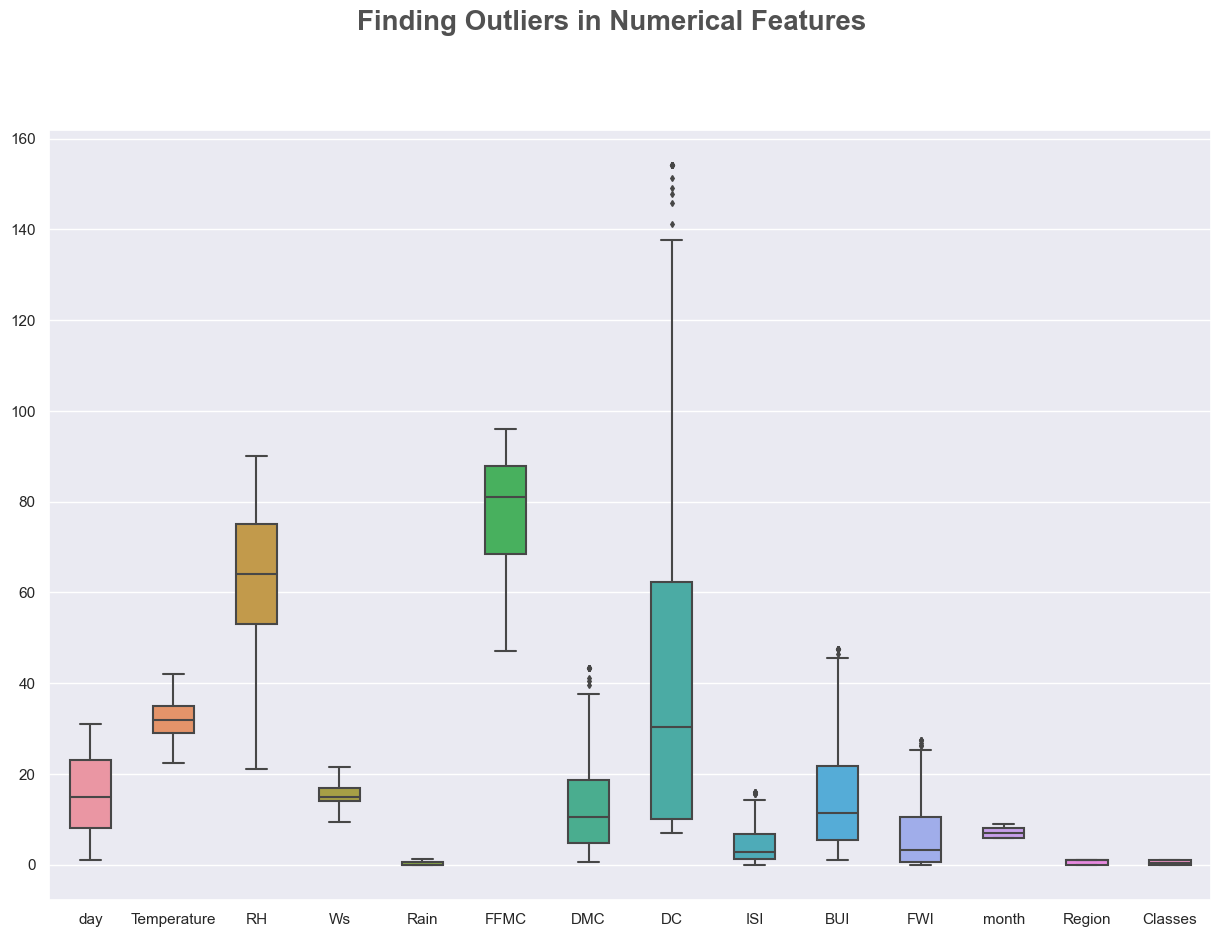

In [166]:
fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle('Finding Outliers in Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.boxplot(data=bal_data[num_features], width= 0.5, ax=ax, fliersize=3)

**Observations:**
- So there are a few outliers in the dataset.

**Number of unique values in each columns**

In [167]:
bal_data.nunique()

day             31
Temperature     46
RH              62
Ws              41
Rain            37
FFMC           186
DMC            185
DC             211
ISI            128
BUI            192
FWI            146
month            4
Region           2
Classes          2
dtype: int64

**Separating Different Features**

**Numerical features**

In [168]:
n_features = [feature for feature in bal_data.columns if bal_data[feature].dtype != 'O']
print(f'Number of Numerical Features is {len(n_features)} and they are: \n{n_features}')

Number of Numerical Features is 14 and they are: 
['day', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'month', 'Region', 'Classes']


**Discrete features**

In [169]:
d_features = [feature for feature in n_features if len(bal_data[feature].unique()) <= 10]
print(f'Number of Discrete Features is {len(d_features)} and they are: \n{d_features}')

Number of Discrete Features is 3 and they are: 
['month', 'Region', 'Classes']


**Continuous features**

In [170]:
c_features = [feature for feature in n_features if feature not in d_features]
print(f'Number of Continuous Features is {len(c_features)} and they are: \n{c_features}')

Number of Continuous Features is 11 and they are: 
['day', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


**Doing Outlier handling like before**

In [171]:
def detect_outliers(col):
    percentile25 = bal_data[col].quantile(0.25)
    percentile75 = bal_data[col].quantile(0.75)
    print('\n ####', col , '####')
    print("25percentile: ",percentile25)
    print("75percentile: ",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit: ",upper_limit)
    print("Lower limit: ",lower_limit)
    
    # replacing the outliers with the upper limit and lower limit values
    bal_data.loc[(bal_data[col]>upper_limit), col]= upper_limit
    bal_data.loc[(bal_data[col]<lower_limit), col]= lower_limit    
    return bal_data

In [172]:
for col in c_features:
         detect_outliers(col)


 #### day ####
25percentile:  8.0
75percentile:  23.0
Upper limit:  45.5
Lower limit:  -14.5

 #### Temperature ####
25percentile:  29.027314803330263
75percentile:  35.0
Upper limit:  43.9590277950046
Lower limit:  20.068287008325658

 #### RH ####
25percentile:  53.0
75percentile:  75.0
Upper limit:  108.0
Lower limit:  20.0

 #### Ws ####
25percentile:  14.0
75percentile:  17.0
Upper limit:  21.5
Lower limit:  9.5

 #### Rain ####
25percentile:  0.0
75percentile:  0.6
Upper limit:  1.5
Lower limit:  -0.8999999999999999

 #### FFMC ####
25percentile:  68.375
75percentile:  87.8
Upper limit:  116.9375
Lower limit:  39.237500000000004

 #### DMC ####
25percentile:  4.775
75percentile:  18.625
Upper limit:  39.4
Lower limit:  -15.999999999999998

 #### DC ####
25percentile:  10.0
75percentile:  62.4
Upper limit:  141.0
Lower limit:  -68.6

 #### ISI ####
25percentile:  1.2767299539818133
75percentile:  6.825
Upper limit:  15.147405069027279
Lower limit:  -7.045675115045467

 #### BUI #

**Again checking for outliers**

<AxesSubplot:>

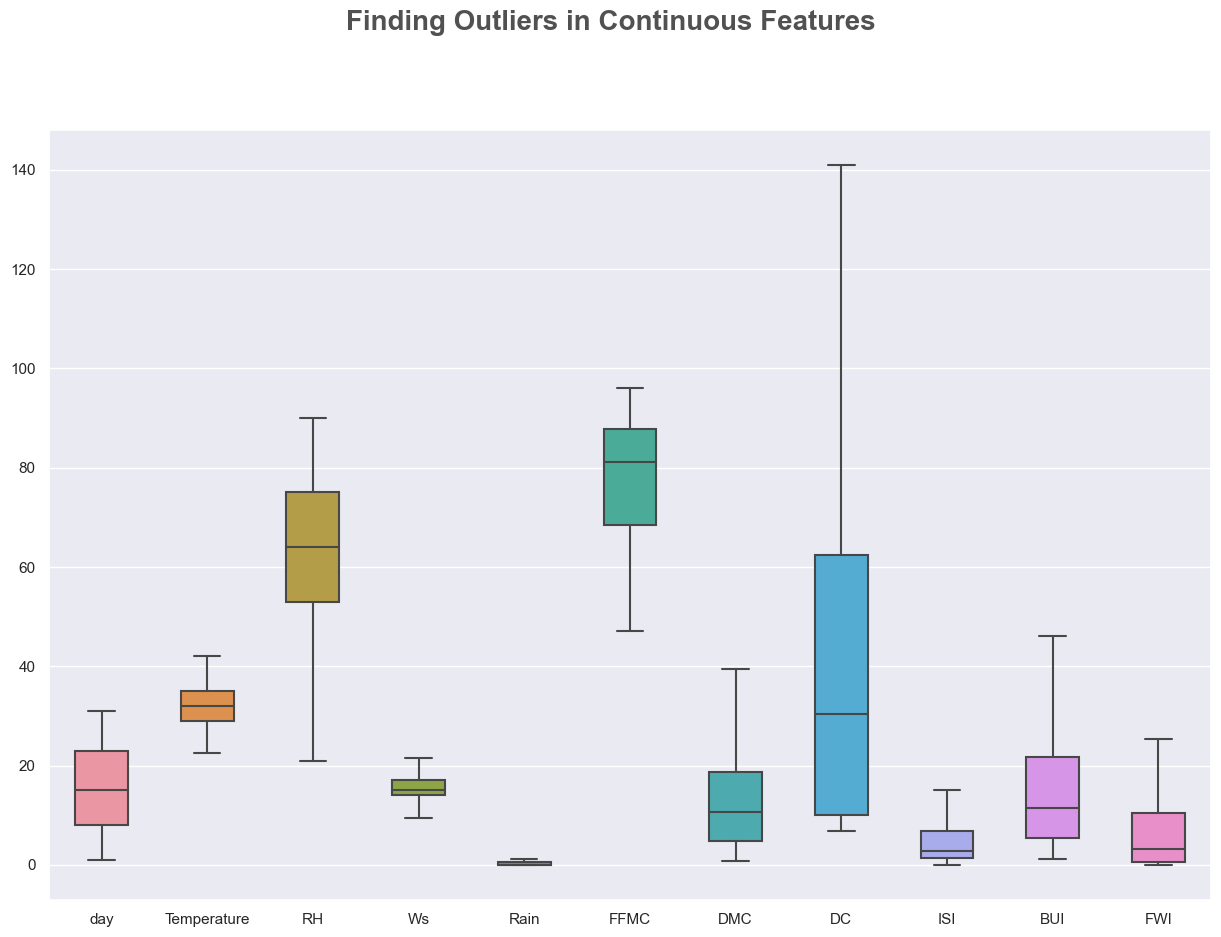

In [173]:
fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle('Finding Outliers in Continuous Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.boxplot(data=bal_data[c_features], width= 0.5, ax=ax, fliersize=3)

**Observations:**
- Now all the outliers are gone

**Again Creating the final dataset**

In [174]:
final_df = pd.concat([bal_data[c_features], bal_data[d_features]], axis=1)
final_df['day'] = final_df['day'].astype(int)
final_df.head()

day  Temperature  RH    Ws  Rain    FFMC  DMC    DC  ISI  BUI  FWI  month  \
0    1         29.0  57  18.0  0.00  65.700  3.4   7.6  1.3  3.4  0.5      6   
1    2         29.0  61  13.0  1.25  64.400  4.1   7.6  1.0  3.9  0.4      6   
2    3         26.0  82  21.5  1.25  47.175  2.5   7.1  0.3  2.7  0.1      6   
3    4         25.0  89  13.0  1.25  47.175  1.3   6.9  0.0  1.7  0.0      6   
4    5         27.0  77  16.0  0.00  64.800  3.0  14.2  1.2  3.9  0.5      6   

   Region  Classes  
0       1        0  
1       1        0  
2       1        0  
3       1        0  
4       1        0

In [175]:
# Again creating independent and dependent variables

y_imb1 = final_df['Classes']
X_imb1 = final_df.drop(columns=['Classes'], axis=1)

In [176]:
X_imb1

day  Temperature  RH         Ws      Rain       FFMC        DMC  \
0      1    29.000000  57  18.000000  0.000000  65.700000   3.400000   
1      2    29.000000  61  13.000000  1.250000  64.400000   4.100000   
2      3    26.000000  82  21.500000  1.250000  47.175000   2.500000   
3      4    25.000000  89  13.000000  1.250000  47.175000   1.300000   
4      5    27.000000  77  16.000000  0.000000  64.800000   3.000000   
..   ...          ...  ..        ...       ...        ...        ...   
267    2    35.000000  60  13.413232  0.329338  77.010738   5.729338   
268   15    27.388925  80  16.694463  1.120147  49.060090   2.679186   
269   22    27.172707  65  21.316498  0.397841  68.482808  10.610101   
270   14    24.382541  83  17.295243  0.725159  47.175000   1.053016   
271   25    37.366275  61   9.704216  0.791569  75.637940  11.332412   

            DC       ISI        BUI       FWI  month  Region  
0     7.600000  1.300000   3.400000  0.500000      6       1  
1     7.600000  1.000000   3.900000  0.400000      6       1  
2     7.100000  0.300000   2.700000  0.100000      6       1  
3     6.900000  0.000000   1.700000  0.000000      6       1  
4    14.200000  1.200000   3.900000  0.500000      6       1  
..         ...       ...        ...       ...    ...     ...  
267  10.000000  1.700000   5.500000  0.800000      8       1  
268   7.384723  0.369446   2.755570  0.084723      6       1  
269  71.382036  1.815112  15.514419  2.145336      7       1  
270   7.376508  0.161746   1.553016  0.000000      9       1  
271  17.452039  1.304216  11.114098  0.822529      7       0  

[272 rows x 13 columns]

In [177]:
y_imb1

0      0
1      0
2      0
3      0
4      0
      ..
267    0
268    0
269    0
270    0
271    0
Name: Classes, Length: 272, dtype: int64

#### Standardizing or feature scaling the dataset (Feature Engineering)

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [179]:
# scalling of data for features in X

scaled_X = scaler.fit_transform(X_imb1)
scaled_X

array([[-1.61707905, -0.79933953, -0.39402615, ..., -0.82498229,
        -1.30081895,  0.99267389],
       [-1.50464411, -0.79933953, -0.1207945 , ..., -0.83922504,
        -1.30081895,  0.99267389],
       [-1.39220916, -1.62459773,  1.31367163, ..., -0.88195327,
        -1.30081895,  0.99267389],
       ...,
       [ 0.74405478, -1.30200224,  0.15243714, ..., -0.59064133,
        -0.40279165,  0.99267389],
       [-0.15542478, -2.0695383 ,  1.38197954, ..., -0.89619601,
         1.39326293,  0.99267389],
       [ 1.08135961,  1.5021062 , -0.1207945 , ..., -0.77904526,
        -0.40279165, -1.00738017]])

In [180]:
# Checking multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# multicollinearity

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif["Features"] = X_imb1.columns

#let's check the values
vif

vif     Features
0     1.545953          day
1     2.654688  Temperature
2     3.495336           RH
3     1.375508           Ws
4     3.491146         Rain
5     8.087178         FFMC
6    77.471701          DMC
7    26.362091           DC
8    36.377356          ISI
9   168.799286          BUI
10   55.200596          FWI
11    1.090789        month
12    1.578185       Region

**Observations:**

The features `DMC`, `DC`, `ISI`, `BUI`, `FWI` are highly correlated.

#### Now performing Logistic regression

In [181]:
# Creating the test and train dataset

X_train_imb1, X_test_imb1, y_train_imb1, y_test_imb1 = train_test_split(
    scaled_X, y_imb1, test_size=0.25, random_state=355)

In [182]:
X_train_imb1.shape

(204, 13)

In [183]:
X_test_imb1.shape

(68, 13)

In [184]:
y_train_imb1.shape

(204,)

In [185]:
y_test_imb1.shape

(68,)

**Observations:**

Now we have 204 rows for training and 68 for test datasets.

### Model Training

#### Training the model

In [186]:
from sklearn.linear_model import LogisticRegression

log_reg_imb1 = LogisticRegression()

log_reg_imb1.fit(X_train_imb1, y_train_imb1)

LogisticRegression()

**Prediction for test data**

In [187]:
pred_log_reg_imb1 = log_reg_imb1.predict(X_test_imb1)
pred_log_reg_imb1

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=int64)

**Intercept and coefficient**

In [188]:
print('Intercept is :',log_reg_imb1.intercept_)
print('\nCoefficient is :',log_reg_imb1.coef_)

Intercept is : [0.80694617]

Coefficient is : [[-2.76846541e-01 -1.03316713e-03  1.52959495e-01 -1.74675249e-01
  -6.52389492e-03  2.56436400e+00 -3.79110311e-01  2.13721476e-01
   2.47536764e+00  2.47654032e-01  1.86504999e+00  1.50131548e-01
  -2.37840039e-01]]


In [189]:
print("Training Score:",log_reg_imb1.score(X_train_imb1, y_train_imb1))
print("\nTest Score:",log_reg_imb1.score(X_test_imb1,y_test_imb1))

Training Score: 0.9656862745098039

Test Score: 0.9852941176470589


**Observations:**

- So there is no overfitting or underfitting condition.

### Performence metrics

In [190]:
accuracy_score(y_test_imb1, pred_log_reg_imb1)

0.9852941176470589

In [191]:
# creating a Confusion Matrix


conf_mat_imb1 = confusion_matrix(y_test_imb1, pred_log_reg_imb1)
conf_mat_imb1

array([[36,  0],
       [ 1, 31]], dtype=int64)

In [192]:
# Distributing the values for the TP, TN, FP, FN from the confusion matrix

true_positive = conf_mat_imb1[0][0]
false_positive = conf_mat_imb1[0][1]
false_negative = conf_mat_imb1[1][0]
true_negative = conf_mat_imb1[1][1]

In [193]:
# Checking Precison

Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [194]:
# Checking Recall

Recall = true_positive/(true_positive+false_negative)
Recall

0.972972972972973

In [195]:
# Checking F1 Score

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9863013698630138

In [196]:
#Classification report

print(classification_report(y_test_imb1, pred_log_reg_imb1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.98        32

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0.99      0.99      0.99        68



**Observations:**

- Here also accuracy is 98%.

#### Scenario 2: First create a model, and instead of Accuracy choose either Precision, Recall or F1-Score.

In [197]:
# importing the imbalanced dataset

imb_df = pd.read_csv("dataset/Algerian_forest_imb.csv", index_col=0)
imb_df.shape

(243, 14)

In [198]:
# let's again see the output counts

imb_df.Classes.value_counts()

1    218
0     25
Name: Classes, dtype: int64

#### Outlier handling

In [199]:
# define numerical & categorical columns in this new dataset

num_features1 = [feature for feature in imb_df.columns if imb_df[feature].dtypes != 'O']
cat_features1 = [feature for feature in imb_df.columns if imb_df[feature].dtypes == 'O']


print(f"The number of Numerical features are: {len(num_features1)}, and the column names are:\n{num_features1}")
print(f"\nThe number of Categorical features are: {len(cat_features1)}, and the column names are:\n{cat_features1}")

The number of Numerical features are: 14, and the column names are:
['day', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'month', 'Region', 'Classes']

The number of Categorical features are: 0, and the column names are:
[]


#### Checking for outliers

<AxesSubplot:>

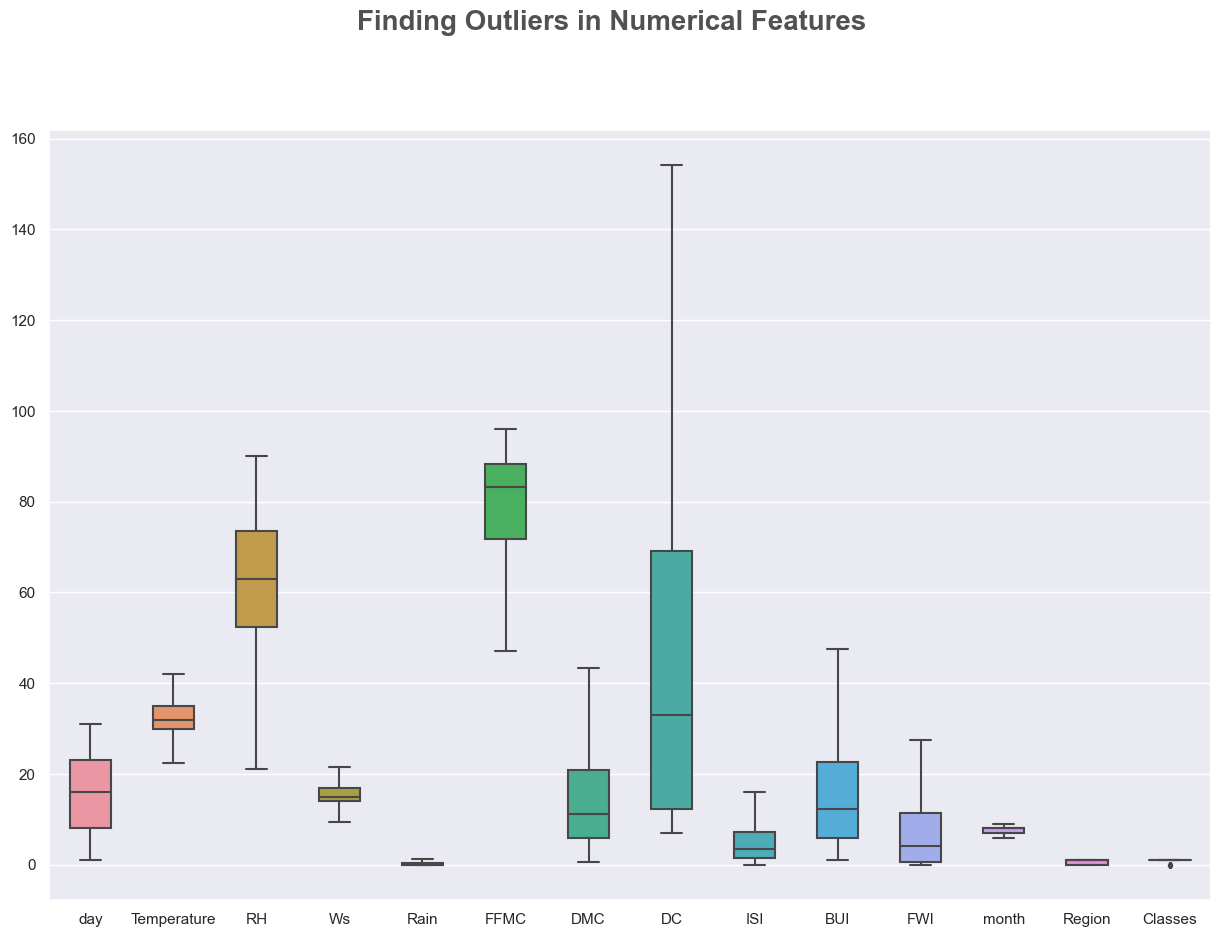

In [200]:
fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle('Finding Outliers in Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.boxplot(data=imb_df[num_features1], width= 0.5, ax=ax, fliersize=3)

**Observations:**

- So there are no outliers in the dataset, as only the target variable has been manupulated here after doing all the EDA at first.

In [201]:
imb_df.head()

day  Temperature  RH    Ws  Rain  FFMC   DMC       DC   ISI     BUI  \
120   29         26.0  80  16.0  1.25  47.4   2.9    7.700   0.3   3.000   
89    29         35.0  48  18.0  0.00  90.1  43.3  154.225  12.5  47.625   
100    9         30.0  77  15.0  1.00  56.1   2.1    8.400   0.7   2.600   
27    28         32.0  55  14.0  0.00  89.1  25.5   88.500   7.6  29.700   
219    4         30.0  66  15.0  0.20  73.5   4.1   26.600   1.5   6.000   

        FWI  month  Region  Classes  
120   0.100      9       1        1  
89   27.575      8       1        1  
100   0.200      9       1        1  
27   13.900      6       1        1  
219   0.700      9       0        1

In [202]:
# Again creating independent and dependent variables

y_imb2 = imb_df['Classes']
X_imb2 = imb_df.drop(columns=['Classes'], axis=1)

In [203]:
X_imb2

day  Temperature  RH    Ws  Rain  FFMC   DMC       DC   ISI     BUI  \
120   29         26.0  80  16.0  1.25  47.4   2.9    7.700   0.3   3.000   
89    29         35.0  48  18.0  0.00  90.1  43.3  154.225  12.5  47.625   
100    9         30.0  77  15.0  1.00  56.1   2.1    8.400   0.7   2.600   
27    28         32.0  55  14.0  0.00  89.1  25.5   88.500   7.6  29.700   
219    4         30.0  66  15.0  0.20  73.5   4.1   26.600   1.5   6.000   
..   ...          ...  ..   ...   ...   ...   ...      ...   ...     ...   
159    6         35.0  42  15.0  0.30  84.7  15.5   45.100   4.3  16.700   
153   30         34.0  42  15.0  1.25  79.7  12.0    8.500   2.2  11.500   
115   24         29.0  65  19.0  0.60  68.3   5.5   15.200   1.5   5.800   
26    27         34.0  53  18.0  0.00  89.0  21.6   80.300   9.2  25.800   
61     1         36.0  45  14.0  0.00  78.8   4.8   10.200   2.0   4.700   

        FWI  month  Region  
120   0.100      9       1  
89   27.575      8       1  
100   0.200      9       1  
27   13.900      6       1  
219   0.700      9       0  
..      ...    ...     ...  
159   6.300      7       0  
153   2.200      6       0  
115   0.700      9       1  
26   15.000      6       1  
61    0.900      8       1  

[243 rows x 13 columns]

In [204]:
y_imb2

120    1
89     1
100    1
27     1
219    1
      ..
159    0
153    0
115    0
26     0
61     0
Name: Classes, Length: 243, dtype: int64

**Standardizing or feature scaling the dataset (Feature Engineering)**

In [205]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [206]:
# scalling of data for features in X

scaled_X_new = scaler.fit_transform(X_imb2)
scaled_X_new

array([[ 1.50024646, -1.70570273,  1.21363098, ..., -0.94548115,
         1.34646842,  0.99589321],
       [ 1.50024646,  0.78786136, -0.94887922, ...,  2.82538742,
         0.44758978,  0.99589321],
       [-0.76621229, -0.59745203,  1.01089565, ..., -0.93175642,
         1.34646842,  0.99589321],
       ...,
       [ 0.93363177, -0.8745147 ,  0.19995433, ..., -0.86313279,
         1.34646842,  0.99589321],
       [ 1.27360058,  0.51079868, -0.610987  , ...,  1.09950308,
        -1.35016751,  0.99589321],
       [-1.67279579,  1.06492403, -1.15161455, ..., -0.83568334,
         0.44758978,  0.99589321]])

In [207]:
# Checking multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# multicollinearity

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(scaled_X_new,i) for i in range(scaled_X_new.shape[1])]
vif["Features"] = X_imb2.columns

#let's check the values
vif

vif     Features
0     1.532477          day
1     2.541074  Temperature
2     3.599228           RH
3     1.333700           Ws
4     3.451027         Rain
5     7.429418         FFMC
6    69.476291          DMC
7    24.280877           DC
8    30.049575          ISI
9   146.767696          BUI
10   46.795758          FWI
11    1.096202        month
12    1.562188       Region

**Observations:**

- The features `DMC`, `DC`, `ISI`, `BUI`, `FWI` are highly correlated.

#### Now performing logistic regression

In [242]:
# Creating the test and train dataset

X_train_imb2, X_test_imb2, y_train_imb2, y_test_imb2 = train_test_split(
    scaled_X_new, y_imb2, test_size=0.33, random_state=42)

In [243]:
X_train_imb2.shape

(162, 13)

In [244]:
y_train_imb2.shape

(162,)

In [245]:
X_test_imb2.shape

(81, 13)

In [246]:
y_test_imb2.shape

(81,)

**Observations:**

- Now we have 182 rows for training and 61 for test datasets.

### Model Training


#### Training the model

In [247]:
from sklearn.linear_model import LogisticRegression

log_reg_imb2 = LogisticRegression()

log_reg_imb2.fit(X_train_imb2, y_train_imb2)

LogisticRegression()

#### Prediction for test data

In [248]:
pred_log_reg_imb2 = log_reg_imb2.predict(X_test_imb2)
pred_log_reg_imb2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### Intercept and coefficient

In [249]:
print('Intercept is :',log_reg_imb2.intercept_)
print('\nCoefficient is :',log_reg_imb2.coef_)

Intercept is : [2.54918226]

Coefficient is : [[-0.604715   -0.11971206  0.70810325 -0.48748825 -0.37673739 -0.34977828
   0.52236955  0.22234071 -0.61040371  0.01122689  0.52736356  0.07361866
  -0.67366869]]


In [250]:
print("Training Score:",log_reg_imb2.score(X_train_imb2, y_train_imb2))
print("\nTest Score:",log_reg_imb2.score(X_test_imb2, y_test_imb2))

Training Score: 0.8765432098765432

Test Score: 0.9012345679012346


**Observations:**

- Ther is a slight difference between train and test dataset but it cannot be defined as overfitting or underfitting.

### Performence metrics

In [251]:
accuracy_score(y_test_imb2, pred_log_reg_imb2)

0.9012345679012346

In [252]:
# creating a Confusion Matrix


conf_mat_imb2 = confusion_matrix(y_test_imb2, pred_log_reg_imb2)
conf_mat_imb2

array([[ 0,  8],
       [ 0, 73]], dtype=int64)

In [253]:
# Distributing the values for the TP, TN, FP, FN from the confusion matrix

true_positive = conf_mat_imb2[0][0]
false_positive = conf_mat_imb2[0][1]
false_negative = conf_mat_imb2[1][0]
true_negative = conf_mat_imb2[1][1]

In [254]:
# Checking Accuracy

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9012345679012346

In [255]:
# Checking Precison

Precision = true_positive/(true_positive+false_positive)
Precision

0.0

In [256]:
# Checking Recall

Recall = true_positive/(true_positive+false_negative)
Recall

nan

In [257]:
# Checking F1 Score

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

nan

In [258]:
#Classification report

print(classification_report(y_test_imb2, pred_log_reg_imb2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.90      1.00      0.95        73

    accuracy                           0.90        81
   macro avg       0.45      0.50      0.47        81
weighted avg       0.81      0.90      0.85        81



### Seeing both the classification reports

In [259]:
print("Classification Report of first scenario\n")
print(classification_report(y_test_imb1, pred_log_reg_imb1))

print("\nClassification Report of second scenario\n")
print(classification_report(y_test_imb2, pred_log_reg_imb2))

Classification Report of first scenario

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.98        32

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0.99      0.99      0.99        68


Classification Report of second scenario

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.90      1.00      0.95        73

    accuracy                           0.90        81
   macro avg       0.45      0.50      0.47        81
weighted avg       0.81      0.90      0.85        81

